# P4DS Final Project: BankChurners Dataset

Nhóm 26:
Sinh viên thực hiện:
- 23122035 - Châu Văn Minh Khoa
- 23122046 - Phan Ngọc Quân 

## I. DATA COLLECTION

### Dữ liệu của bạn là về chủ đề gì?


- Ngành ngân hàng chịu áp lực lớn trong việc giữ chân khách hàng thẻ tín dụng; nếu khách đóng tài khoản thì doanh thu từ phí và lãi giảm đáng kể.


- Bộ dữ liệu BankChurners ghi nhận hồ sơ khách hàng cá nhân, thói quen sử dụng thẻ, tương tác dịch vụ và trạng thái rời bỏ (`Attrition_Flag`) để đo lường khả năng trung thành.


- Mục tiêu: xây dựng nền tảng phân tích để nhận diện sớm nguy cơ rời bỏ, từ đó đề xuất chương trình chăm sóc hoặc ưu đãi phù hợp giúp duy trì khách hàng giá trị.


- Việc mô hình hóa churn hỗ trợ nhóm kinh doanh tối ưu chi phí marketing, đồng thời cải thiện trải nghiệm khách hàng dựa trên hành vi thực tế.

### Nguồn dữ liệu
- Nguồn: Kaggle – Credit Card Customers (tệp `BankChurners.csv`, https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers).
- Public date(Kaggle): December 1, 2024

### Quyền sử dụng
- License: CC0-Public Domain, được chia sẻ cho mục đích học tập và nghiên cứu.


- Mục đích sử dụng: phục vụ môn học, tuân thủ điều khoản Kaggle; dữ liệu đã được ẩn danh nhưng vẫn cần tránh suy diễn định danh cá nhân cụ thể.


- Lưu ý đạo đức: các biến tài chính nên được diễn giải có trách nhiệm, không gán nhãn tiêu cực cho nhóm khách hàng cụ thể; khi chia sẻ kết quả cần nêu rõ đây là dữ liệu giả lập/ẩn danh.

### Người ta thu thập dữ liệu như thế nào?
Các bước thực hiện:
- Đăng nhập vào website https://leaps.analyttica.com/home.
- Click on the 'Apply' tab trên góc trên bên trái
- Ở đây, ta có thể tìm thấy nhiều vấn đề của các doanh nghiệp để giải quyết cùng với bộ dataset từ họ.

Ở trên là các bước thực hiện được ghi trên kaggle. Tuy nhiên, do bộ dữ liệu đã khá cũ nên cách trên hiện nay không hoạt động được. Nhóm em có check thử thì thấy trang web đã thay đổi tên miền.

### Mục đích lựa chọn dữ liệu này

- Dataset có đủ dữ liệu để phân tích (10127 dòng, 23 cột) đa dạng biến về nhân khẩu học, lịch sử giao dịch, mức độ tương tác; phù hợp để luyện quy trình EDA, tiền xử lý và xây dựng mô hình phân loại churn.
- Có cả dữ liệu numerical và categorical nên có thể áp dụng nhiều kỹ thuật phân tích
- Dữ liệu thực tế từ người dùng nên có ý nghĩa thực tế
- Bối cảnh ngân hàng quen thuộc với các bài toán khoa học dữ liệu hướng kinh doanh, thuận tiện để trình bày insight định lượng và gợi ý chiến lược.

### Mô tả dữ liệu


- Mỗi dòng: Một khách hàng thẻ tín dụng với trạng thái tiếp tục hay rời bỏ, kèm các đặc trưng nhân khẩu học và hành vi sử dụng thẻ.


- Các nhóm biến chính:


  - Numerical: `Customer_Age`, `Months_on_book`, `Credit_Limit`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Avg_Utilization_Ratio`,...


  - Categorical: `Gender`, `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category`.


- Mục tiêu phân tích: khám phá phân bố, xác định đặc trưng quan trọng ảnh hưởng churn, chuẩn bị cho mô hình dự báo `Attrition_Flag`.


- Thách thức: lớp churn chiếm tỷ lệ nhỏ (~16%), cần lưu ý khi xây dựng mô hình và đánh giá hiệu năng.




-> Tóm lại, đây là bộ dữ liệu thực hành kinh điển cho bài toán churn trong lĩnh vực ngân hàng/thẻ tín dụng, thích hợp để minh họa pipeline EDA → tiền xử lý → mô hình phân loại và các khuyến nghị giữ chân khách hàng.

## II. DATA EXPLORATION

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

### Dataset overview

#### Basic Information

##### Đọc dữ liệu

In [61]:
data_path = "data/BankChurners.csv"
df = pd.read_csv(data_path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


##### Số dòng và cột

In [62]:
rows, cols = df.shape
print(f"Số dòng: {rows}, Số cột: {cols}")

Số dòng: 10127, Số cột: 23


- Như vậy data có số dòng là 10.127 và số cột là 23.

##### Các dòng dữ liệu
Mỗi dòng có ý nghĩa gì? Có dòng nào có ý nghĩa khác với các dòng còn lại không?

In [63]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
7340,719414658,Existing Customer,52,F,0,Graduate,Single,Unknown,Blue,36,...,12366.0,0,12366.0,0.738,4880,76,0.900,0.000,0.000112,0.99989
2942,708740808,Existing Customer,45,M,4,Graduate,Married,$40K - $60K,Blue,36,...,4112.0,0,4112.0,0.777,2949,54,1.250,0.000,0.000541,0.99946
9930,720515883,Existing Customer,57,F,1,Graduate,Married,Less than $40K,Blue,46,...,3638.0,0,3638.0,0.837,16469,115,0.667,0.000,0.000169,0.99983
4754,711100608,Attrited Customer,55,M,1,Uneducated,Single,$60K - $80K,Blue,48,...,1723.0,0,1723.0,1.038,2574,43,0.720,0.000,0.990980,0.00902
7691,709071408,Existing Customer,56,F,5,Graduate,Single,$40K - $60K,Blue,37,...,2607.0,1702,905.0,0.802,4949,74,0.762,0.653,0.000071,0.99993
9525,811793433,Existing Customer,50,F,3,Graduate,Divorced,Unknown,Silver,45,...,34516.0,2381,32135.0,0.748,15071,103,0.717,0.069,0.000052,0.99995
4130,708724908,Existing Customer,47,F,2,High School,Single,Less than $40K,Blue,35,...,2262.0,0,2262.0,0.806,4113,83,0.627,0.000,0.000186,0.99981
1557,713983308,Existing Customer,60,M,0,Post-Graduate,Married,$60K - $80K,Blue,49,...,3182.0,1928,1254.0,0.509,1233,35,0.400,0.606,0.000160,0.99984
1427,710035008,Existing Customer,31,F,0,Uneducated,Single,Less than $40K,Blue,24,...,3827.0,1397,2430.0,0.880,2491,64,1.000,0.365,0.000288,0.99971
2975,720188508,Existing Customer,43,M,4,Graduate,Single,$60K - $80K,Blue,25,...,13193.0,1749,11444.0,0.671,4071,64,0.730,0.133,0.000342,0.99966


- Mỗi dòng tương ứng một khách hàng thẻ tín dụng, có vẻ không có dòng nào khác biệt bất thường.

##### Overall size

In [64]:
size_mb = os.path.getsize("data/BankChurners.csv") / (1024**2)
print(f"Dataset size: {size_mb:.2f} MB")

Dataset size: 1.45 MB


#### Data Integrity

##### Kiểm tra trùng lặp

In [65]:
# Kiểm tra trùng lặp hoàn toàn
duplicate_count = df.duplicated().sum()
print(f"Số dòng trùng lặp hoàn toàn: {duplicate_count}")
df[df.duplicated()]

Số dòng trùng lặp hoàn toàn: 0


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


- Không có dòng nào bị trùng hoàn toàn cả.

##### Kiểm tra có dòng nào "empty" hoàn toàn không

In [66]:
empty_rows = df.isna().all(axis=1).sum()
print("Số dòng hoàn toàn trống:", empty_rows)

Số dòng hoàn toàn trống: 0


- Không có dòng nào hoàn toàn empty cả

#### Column Inventory

##### Ý nghĩa các cột

In [67]:
list(df.columns.values)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

| Cột | Ý nghĩa |
|---|---|
| CLIENTNUM | Định danh nội bộ của khách hàng trong hệ thống thẻ tín dụng. |
| Attrition_Flag | Trạng thái khách hàng: `Attrited Customer` (đã đóng) hoặc `Existing Customer` (còn hoạt động). |
| Customer_Age | Tuổi của khách hàng. |
| Gender | Giới tính (`M`/`F`). |
| Dependent_count | Số người phụ thuộc trong hộ gia đình. |
| Education_Level | Trình độ học vấn (High School, Graduate, Doctorate, Unknown,...). |
| Marital_Status | Tình trạng hôn nhân (Married, Single, Divorced,...). |
| Income_Category | Nhóm thu nhập hằng năm (ví dụ: `< $40K`, `$60K - $80K`). |
| Card_Category | Hạng thẻ tín dụng (Blue, Silver, Gold, Platinum). |
| Months_on_book | Số tháng khách hàng đã gắn bó với ngân hàng (tuổi thẻ). |
| Total_Relationship_Count | Tổng số sản phẩm tài chính khách hàng sở hữu. |
| Months_Inactive_12_mon | Số tháng không hoạt động trong 12 tháng gần nhất. |
| Contacts_Count_12_mon | Số lần nhân viên liên hệ khách trong 12 tháng gần nhất. |
| Credit_Limit | Hạn mức tín dụng hiện tại. |
| Total_Revolving_Bal | Số dư quay vòng (revolving balance) trên thẻ. |
| Avg_Open_To_Buy | Hạn mức còn lại trung bình (Credit_Limit - Total_Revolving_Bal). |
| Total_Amt_Chng_Q4_Q1 | Mức thay đổi tổng giá trị giao dịch giữa quý 4 và quý 1. |
| Total_Trans_Amt | Tổng giá trị giao dịch thẻ trong 12 tháng gần nhất. |
| Total_Trans_Ct | Tổng số lượng giao dịch thẻ trong 12 tháng gần nhất. |
| Total_Ct_Chng_Q4_Q1 | Mức thay đổi số lượng giao dịch giữa quý 4 và quý 1. |
| Avg_Utilization_Ratio | Tỷ lệ sử dụng tín dụng trung bình (Total_Revolving_Bal / Credit_Limit). |
| Naive_Bayes_Classifier_..._Education_Level_Months_Inactive_12_mon_1 | Xác suất từ mô hình Naive Bayes nội bộ (thành phần 1) hỗ trợ phân loại churn. |
| Naive_Bayes_Classifier_..._Education_Level_Months_Inactive_12_mon_2 | Xác suất từ mô hình Naive Bayes nội bộ (thành phần 2) bổ sung cho biến trên. |

##### Những cột có tiềm năng để phân tích chuyên sâu
Các cột về đặc tính tài khoản (Account / Relationship)

- Months_on_book

- Total_Relationship_Count

- Card_Category

- Credit_Limit

- Avg_Open_To_Buy

- Avg_Utilization_Ratio

##### Drop Columns
- Xóa cột "CLIENTNUM" vì cột này không mang thông tin để phân tích
- Xóa 2 cột cuối cùng "Naive_Bayes_Classifier..." vì 2 cột này không phải dữ liệu thực tế, được khuyến cáo nên xóa trên kaggle

In [68]:
df = df.drop(columns=['CLIENTNUM'])
df = df.drop(columns=df.columns[-2:])

#### Data Types

##### Kiểu dữ liệu của từng cột

In [69]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

##### Các cột có kiểu dữ liệu không thích hợp
- Nhìn chung thì các cột đều có dữ liệu phù hợp

##### Các cột cần convert data type
- Các cột đều có kiểu dữ liệu phù hợp nên không cột nào cần convert

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

- Như vậy các cột dữ liệu đã ổn để tiếp tục.

### Numerical Columns Analysis

Trước hết, ta cần filter các cột numerical

In [71]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

#### Phân phối dữ liệu và khuynh hướng trung tâm    

##### Hình dạng phân phối

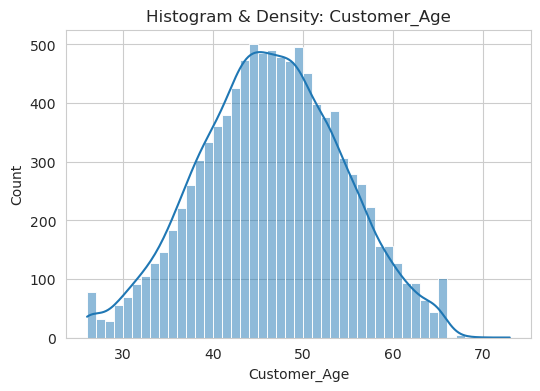


Column: Customer_Age
Độ lệch: -0.033605016317173456
Dữ liệu cân bằng


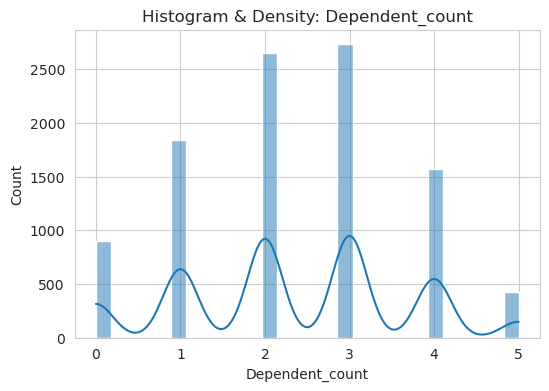


Column: Dependent_count
Độ lệch: -0.020825535616339912
Dữ liệu cân bằng


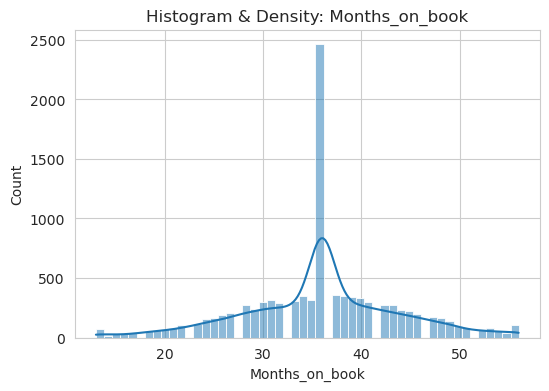


Column: Months_on_book
Độ lệch: -0.10656535989402989
Dữ liệu cân bằng


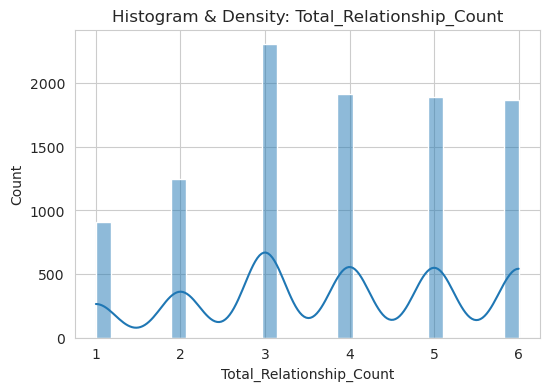


Column: Total_Relationship_Count
Độ lệch: -0.16245241498173682
Dữ liệu cân bằng


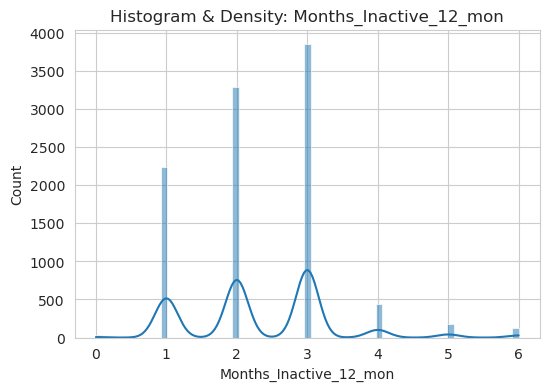


Column: Months_Inactive_12_mon
Độ lệch: 0.6330611289713137
Dữ liệu lệch phải



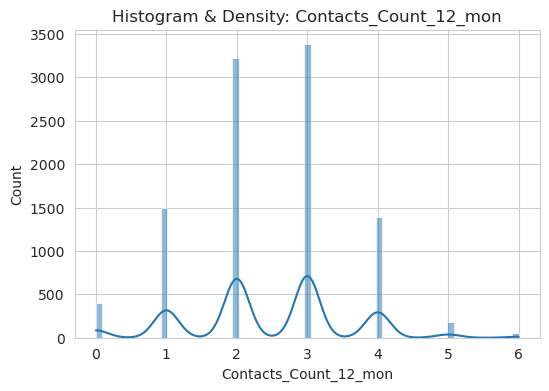


Column: Contacts_Count_12_mon
Độ lệch: 0.011005626218976492
Dữ liệu cân bằng


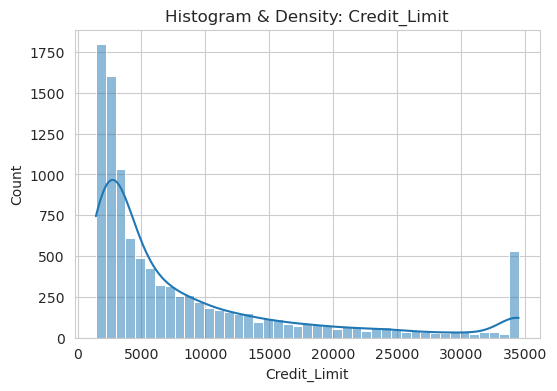


Column: Credit_Limit
Độ lệch: 1.666725807993647
Dữ liệu lệch phải



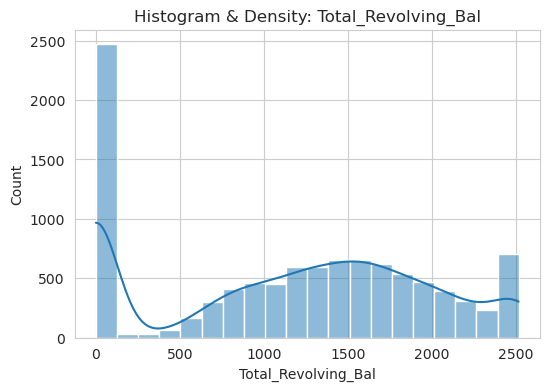


Column: Total_Revolving_Bal
Độ lệch: -0.14883725028007228
Dữ liệu cân bằng


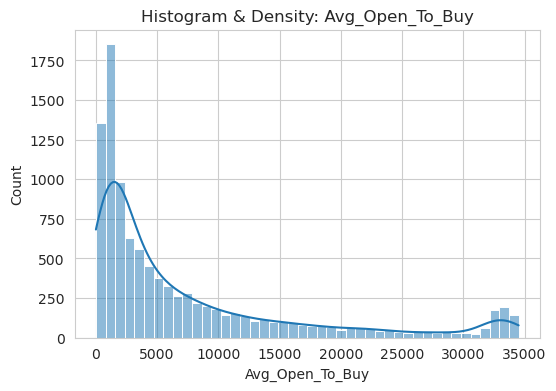


Column: Avg_Open_To_Buy
Độ lệch: 1.6616965459311595
Dữ liệu lệch phải



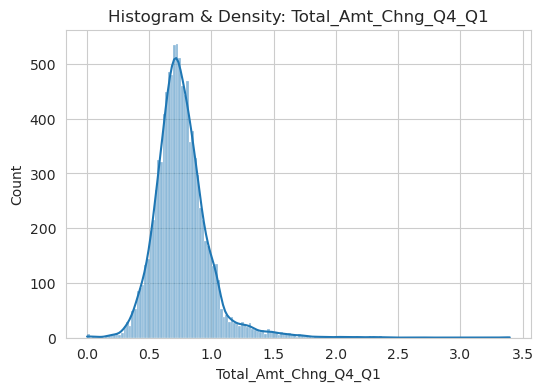


Column: Total_Amt_Chng_Q4_Q1
Độ lệch: 1.7320634114286038
Dữ liệu lệch phải



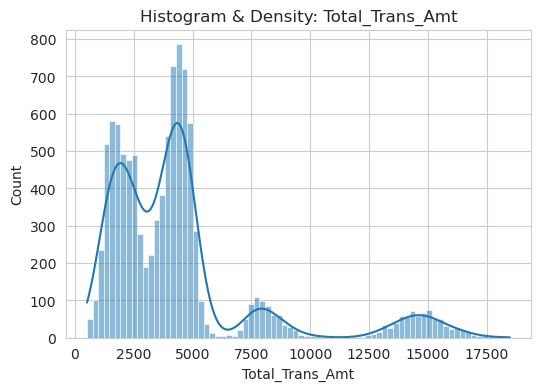


Column: Total_Trans_Amt
Độ lệch: 2.0410034025756936
Dữ liệu lệch phải



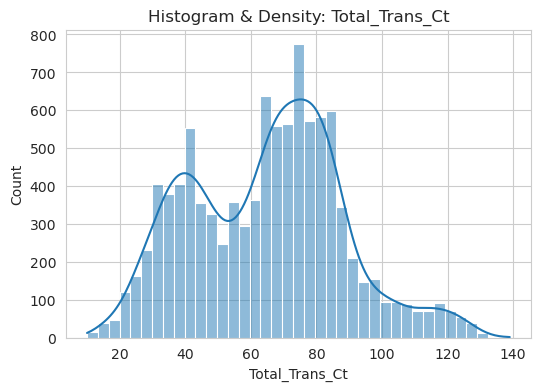


Column: Total_Trans_Ct
Độ lệch: 0.15367306849872275
Dữ liệu cân bằng


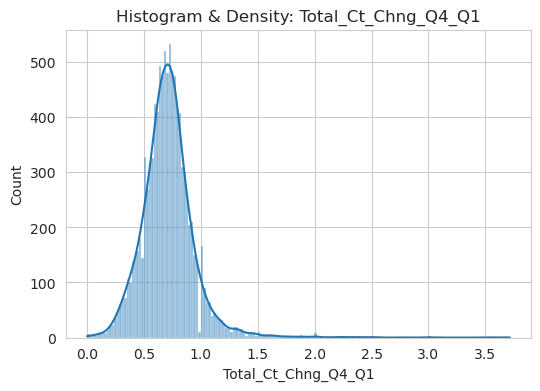


Column: Total_Ct_Chng_Q4_Q1
Độ lệch: 2.0640305679077477
Dữ liệu lệch phải



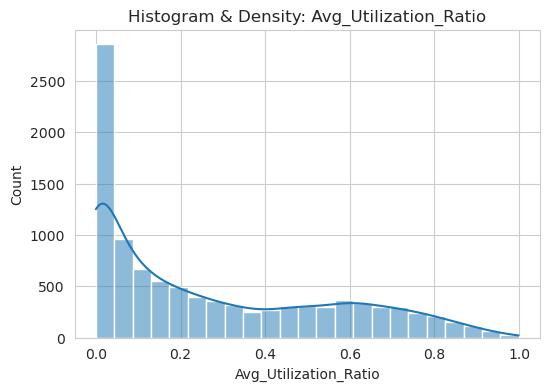


Column: Avg_Utilization_Ratio
Độ lệch: 0.7180079967731994
Dữ liệu lệch phải



In [72]:
skewness = df[numerical_cols].skew()
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram & Density: {col}")
    plt.show()

    print(f"\nColumn: {col}")
    print(f"Độ lệch: {skewness[col]}")

    if skewness[col] > 0.5:
        print("Dữ liệu lệch phải\n")
    elif skewness[col] < -0.5:
        print("Dữ liệu lệch trái\n")
    else:
        print("Dữ liệu cân bằng")


- Có nhiều biến như Customer_Age hay Dependent_count có phân phối gần chuẩn, tức là khá đối xứng và ổn định. 

- Trong khi một số biến tài chính như Credit_Limit, Total_Trans_Amt và Avg_Utilization_Ratio bị lệch phải, nghĩa là phần lớn khách hàng có giá trị thấp, chỉ một nhóm nhỏ có giá trị rất cao. 

- Điều này có thể cho chúng ta gợi ý rằng hành vi chi tiêu và sử dụng thẻ của khách hàng không đồng đều và có thể sử dụng yếu tố này để dự đoán nguy cơ rời bỏ.

#### Range & Outliers
Ở phần này, với các cột có kiểu dữ liệu số để hiểu thêm về dữ liệu, ta sẽ tính:
- Số các giá trị thiếu
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị mean
- Giá trị min
- Giá trị median
- Giá trị std
- Giá trị max

In [73]:
num_summary_rows = []
for col in numerical_cols:
    s = df[col]
    mean_val = s.mean()
    std_val = s.std()
    min_val = s.min()
    q1 = s.quantile(0.25)
    median_val = s.median()
    q3 = s.quantile(0.75)
    max_val = s.max()
    num_summary_rows.append({
        'column': col,
        'mean': mean_val,
        'std': std_val,
        'min': min_val,
        'q1': q1,
        'median': median_val,
        'q3': q3,
        'max': max_val
    })
num_summary_df = pd.DataFrame(num_summary_rows)
num_summary_df

,column,mean,std,min,q1,median,q3,max
0,Customer_Age,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
1,Dependent_count,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
2,Months_on_book,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
3,Total_Relationship_Count,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
4,Months_Inactive_12_mon,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
5,Contacts_Count_12_mon,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
6,Credit_Limit,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
7,Total_Revolving_Bal,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
8,Avg_Open_To_Buy,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
9,Total_Amt_Chng_Q4_Q1,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


##### Outliers Detection
Chúng ta tiến hành kiểm tra xem các cột dữ liệu số có xuất hiện giá trị ngoại lai (outliers) hay không bằng kỹ thuật IQR outlier detection.

In [74]:
outlier_rows = []
outliers = []
for col in numerical_cols:
    s = df[col].dropna()
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (s < lower) | (s > upper)
    outliers.append(s[mask].values)
    outlier_rows.append({"column": col, "outliers": mask.sum(), "percent": round(mask.sum()/len(s)*100,2)})
pd.DataFrame(outlier_rows)

,column,outliers,percent
0,Customer_Age,2,0.02
1,Dependent_count,0,0.00
2,Months_on_book,386,3.81
3,Total_Relationship_Count,0,0.00
4,Months_Inactive_12_mon,331,3.27
5,Contacts_Count_12_mon,629,6.21
6,Credit_Limit,984,9.72
7,Total_Revolving_Bal,0,0.00
8,Avg_Open_To_Buy,963,9.51
9,Total_Amt_Chng_Q4_Q1,396,3.91


##### Kiểm tra outliers

In [75]:
outlier_rows = []

for i in range(len(numerical_cols)):
    print(f"Outliers in {numerical_cols[i]}: {outliers[i][:10]}")


Outliers in Customer_Age: [73 70]
Outliers in Dependent_count: []
Outliers in Months_on_book: [54 56 56 56 54 56 56 56 54 55]
Outliers in Total_Relationship_Count: []
Outliers in Months_Inactive_12_mon: [6 0 5 0 6 5 5 5 6 5]
Outliers in Contacts_Count_12_mon: [0 0 0 0 0 0 0 0 0 0]
Outliers in Credit_Limit: [34516. 29081. 30367. 32426. 34516. 34516. 23957. 34516. 25300. 34516.]
Outliers in Total_Revolving_Bal: []
Outliers in Avg_Open_To_Buy: [32252. 27685. 28005. 31848. 34516. 34516. 33001. 23970. 32753. 27005.]
Outliers in Total_Amt_Chng_Q4_Q1: [1.335 1.541 2.594 1.405 2.175 1.376 1.975 2.204 3.355 1.524]
Outliers in Total_Trans_Amt: [8693 8947 8854 8796 8778 8644 9331 8987 8780 8753]
Outliers in Total_Trans_Ct: [139 138]
Outliers in Total_Ct_Chng_Q4_Q1: [1.625 3.714 2.333 2.333 2.5   1.182 1.364 3.25  2.    1.7  ]
Outliers in Avg_Utilization_Ratio: []


- Nhận xét: Các giá trị outliers được in ra hoàn toàn có thể xảy ra, không quá bất thường nên các outliers này là "genuine extreme values"

#### Data Quality

In [76]:
missing_summary_rows = []
for col in numerical_cols:
    s = df[col]
    missing = s.isna().sum()
    missing_pct = round(missing/len(s)*100,2)
    missing_summary_rows.append({
        'column': col,
        'missing': missing,
        'missing_%': missing_pct
    })
missing_summary_df = pd.DataFrame(missing_summary_rows)
missing_summary_df

,column,missing,missing_%
0,Customer_Age,0,0.0
1,Dependent_count,0,0.0
2,Months_on_book,0,0.0
3,Total_Relationship_Count,0,0.0
4,Months_Inactive_12_mon,0,0.0
5,Contacts_Count_12_mon,0,0.0
6,Credit_Limit,0,0.0
7,Total_Revolving_Bal,0,0.0
8,Avg_Open_To_Buy,0,0.0
9,Total_Amt_Chng_Q4_Q1,0,0.0


Nhận xét: Tất cả các cột đều đây đủ, không chứa missing values nào. Lý giải một chút, một số tổ chức ngân hàng có quy trình ETL chuẩn:

- Missing được xử lý trước khi release dataset

- Các trường bắt buộc đã có giá trị mặc định

Vậy nên dataset này không chứa missing values nào thì cũng là điều dễ hiểu

### Categorical Columns Analysis

Tương tự như numerical columns, ta cũng lọc các cột categorical

In [77]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

#### Value Distribution

##### Unique values

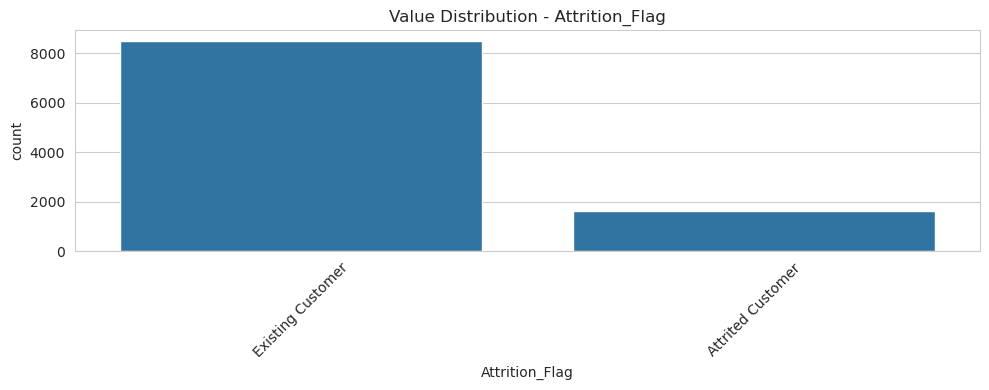


Column: Attrition_Flag
Unique values: 2
Top values:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Dữ liệu không cân bằng



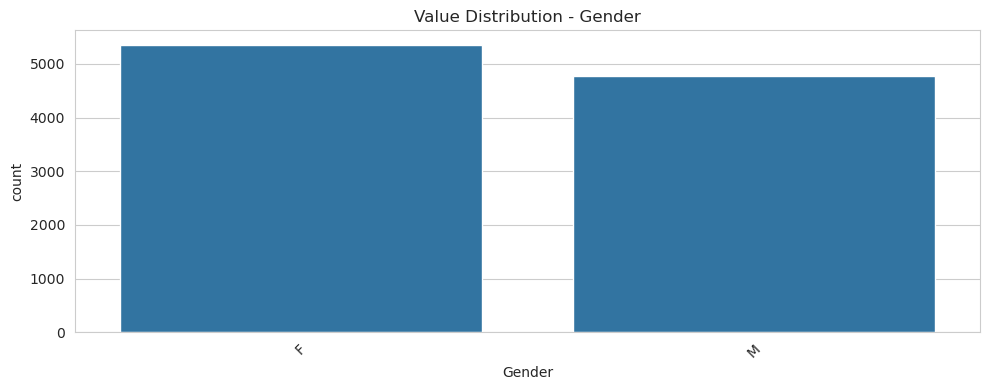


Column: Gender
Unique values: 2
Top values:
Gender
F    5358
M    4769
Name: count, dtype: int64
Dữ liệu cân bằng



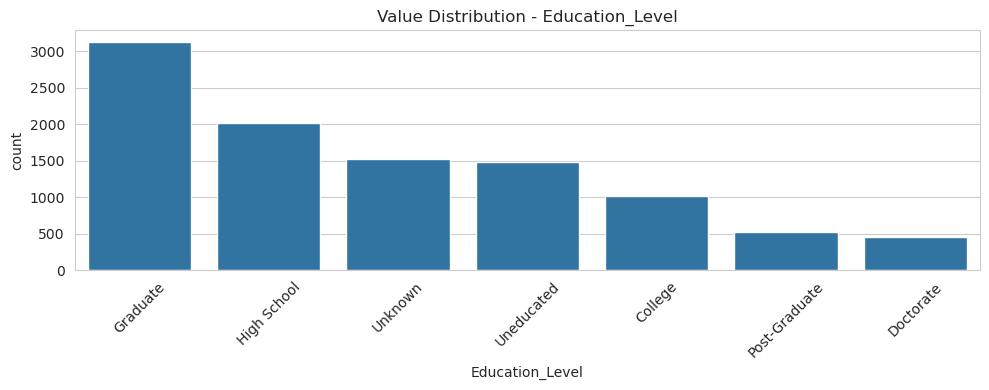


Column: Education_Level
Unique values: 7
Top values:
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Dữ liệu cân bằng



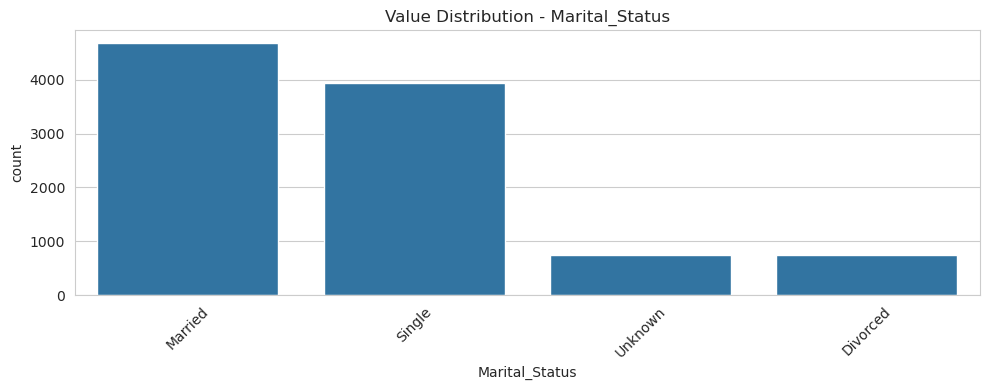


Column: Marital_Status
Unique values: 4
Top values:
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Dữ liệu cân bằng



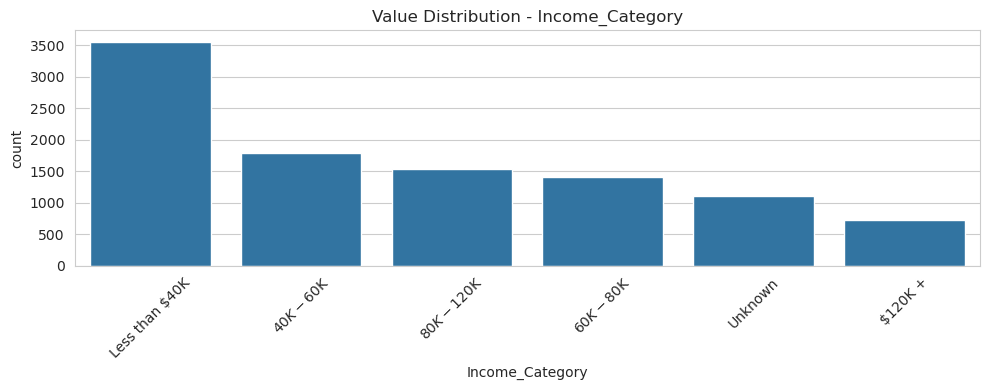


Column: Income_Category
Unique values: 6
Top values:
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Dữ liệu cân bằng



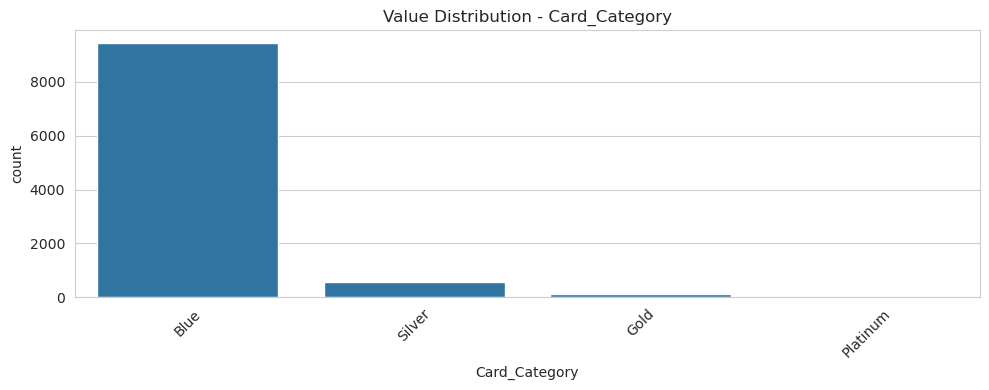


Column: Card_Category
Unique values: 4
Top values:
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
Dữ liệu không cân bằng



,column,unique_values,top_values
0,Attrition_Flag,2,"{'Existing Customer': 8500, 'Attrited Customer..."
1,Gender,2,"{'F': 5358, 'M': 4769}"
2,Education_Level,7,"{'Graduate': 3128, 'High School': 2013, 'Unkno..."
3,Marital_Status,4,"{'Married': 4687, 'Single': 3943, 'Unknown': 7..."
4,Income_Category,6,"{'Less than $40K': 3561, '$40K - $60K': 1790, ..."
5,Card_Category,4,"{'Blue': 9436, 'Silver': 555, 'Gold': 116, 'Pl..."


In [78]:
summary = []

for col in categorical_cols:
    s = df[col]

    # 1. Số lượng giá trị distinct
    unique_count = s.nunique()

    # 2. Top 10 giá trị frequent
    top_values = s.value_counts().head(10)

    summary.append({
        "column": col,
        "unique_values": unique_count,
        "top_values": top_values.to_dict()
    })

    # 3. Visualization
    plt.figure(figsize=(10, 4))
    sns.countplot(x=s, order=s.value_counts().index)
    plt.title(f"Value Distribution - {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"\nColumn: {col}")
    print(f"Unique values: {unique_count}")
    print(f"Top values:\n{top_values}")

    max_ratio = top_values.iloc[0] / len(s)
    if max_ratio > 0.6:
        print("Dữ liệu không cân bằng\n")
    else:
        print("Dữ liệu cân bằng\n")

pd.DataFrame(summary)


Nhìn nhanh vào các biến phân loại cho thấy khách hàng còn sử dụng thẻ (Existing) chiếm đa số (~84%), hạng thẻ Blue áp đảo, trong khi các hạng cao hơn và trạng thái churn khá ít nên cần cân nhắc kỹ khi trực quan hoặc xây dựng mô hình.

#### Data Quality

Ở đây hơi khác một chút so với numerical cols thì categorical cols có sự xuất hiện của missing values. Cụ thể ở các cột Educational_level, Marital_status, Income_Category có các giá trị "Unknown". Ta có thể xem đây là missing values.

##### Tỉ lệ missing values

In [79]:
for col in categorical_cols:
    missing = len(df[df[col] == "Unknown"])
    missing_pct = round(missing/len(df)*100,2)
    print(f"Column: {col}, Missing: {missing}, Missing %: {missing_pct}%")


Column: Attrition_Flag, Missing: 0, Missing %: 0.0%
Column: Gender, Missing: 0, Missing %: 0.0%
Column: Education_Level, Missing: 1519, Missing %: 15.0%
Column: Marital_Status, Missing: 749, Missing %: 7.4%
Column: Income_Category, Missing: 1112, Missing %: 10.98%
Column: Card_Category, Missing: 0, Missing %: 0.0%


##### Kiểm tra giá trị có bị inconsistencied không
Theo quan ở trên, các giá trị đều nhất quán, không có cái nào bị trùng về mặt ý nghĩa

##### Category quá ít quan sát

In [80]:
rare_threshold = 0.01
rare_categories = {}

for col in categorical_cols:
    freq = df[col].value_counts(normalize=True)
    rare = freq[freq < rare_threshold]
    if len(rare) > 0:
        rare_categories[col] = rare

for col, rare in rare_categories.items():
    print(f"\nColumn: {col}")
    print(rare)


Column: Card_Category
Card_Category
Platinum    0.001975
Name: proportion, dtype: float64


- Nhận xét: ta thấy trong cột Card_Category thì giá trị Platinum chiếm chưa đến 0.2%, quá ít. Giá trị này có thể xem xét gộp chung với giá trị khác

### Missing Data Analysis

Trước hết ta chuyển các giá trị "Unknown" về nan 

In [81]:
df.replace("Unknown", np.nan, inplace=True)

#### Overall Assessment

##### Missing values Summary

In [82]:
missing_summary = []
for col in df.columns:
    missing = df[col].isna().sum()
    missing_pct = round(missing/len(df)*100,2)
    missing_summary.append({
        'column': col,
        'missing': missing,
        'missing_pct': missing_pct
    })
missing_summary_df = pd.DataFrame(missing_summary)
missing_summary_df


,column,missing,missing_pct
0,Attrition_Flag,0,0.00
1,Customer_Age,0,0.00
2,Gender,0,0.00
3,Dependent_count,0,0.00
4,Education_Level,1519,15.00
5,Marital_Status,749,7.40
6,Income_Category,1112,10.98
7,Card_Category,0,0.00
8,Months_on_book,0,0.00
9,Total_Relationship_Count,0,0.00


- Ta có thể thấy, trong tổng số 20 cột dữ liệu, chỉ có 3 cột chứa giá trị thiếu (missing values) gồm Education_Level, Marital_Status và Income_Category. Các cột còn lại đều không có giá trị thiếu, cho thấy bộ dữ liệu tương đối sạch và đã được xử lý tốt ở bước tiền xử lý.

- Tuy nhiên, tỷ lệ missing values ở ba cột này là khá đáng kể, trong đó Education_Level có tỷ lệ cao nhất (15%), tiếp theo là Income_Category (10.98%) và Marital_Status (7.40%). Đây đều là các biến phân loại quan trọng, do đó cần lựa chọn phương pháp xử lý phù hợp.

##### Visualize missing data patterns

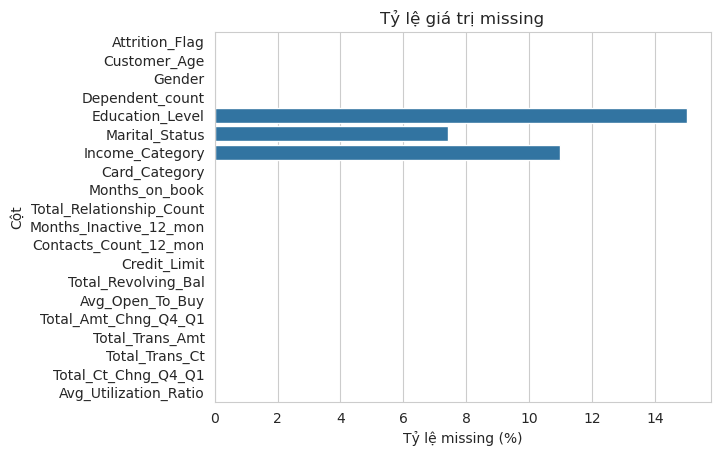

In [83]:
plt.figure()
sns.barplot(x='missing_pct', y='column', data=missing_summary_df)
plt.xlabel('Tỷ lệ missing (%)')
plt.ylabel('Cột')
plt.title('Tỷ lệ giá trị missing')
plt.show()


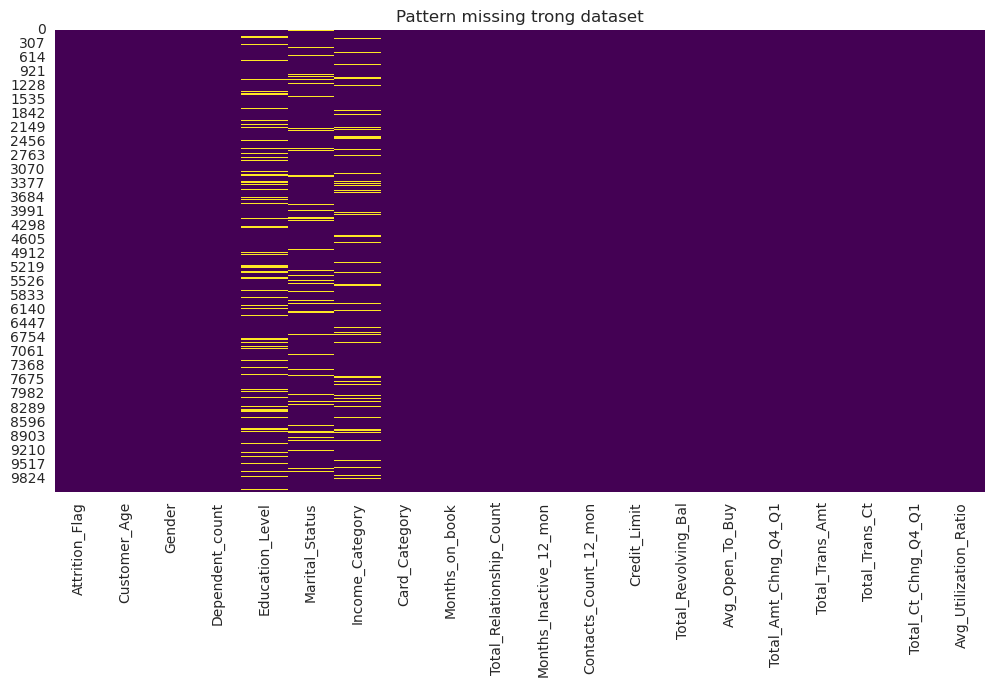

In [84]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Pattern missing trong dataset')
plt.show()

- Nhận xét: các missing values phân bố hoàn toàn ngẫu nhiên, không có pattern cụ thể

### Relationships & Correlations

#### Preliminary Patterns

##### Calculate correlation matrix for numerical variables

In [85]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr() 
print(corr_matrix.head())

                          Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                  1.000000        -0.122254        0.788912   
Dependent_count              -0.122254         1.000000       -0.103062   
Months_on_book                0.788912        -0.103062        1.000000   
Total_Relationship_Count     -0.010931        -0.039076       -0.009203   
Months_Inactive_12_mon        0.054361        -0.010768        0.074164   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
Customer_Age                             -0.010931                0.054361   
Dependent_count                          -0.039076               -0.010768   
Months_on_book                           -0.009203                0.074164   
Total_Relationship_Count                  1.000000               -0.003675   
Months_Inactive_12_mon                   -0.003675                1.000000   

                          Contacts_Count_12_mon  Credit_Limit  \
Customer_Age   

##### Correlation heatmap

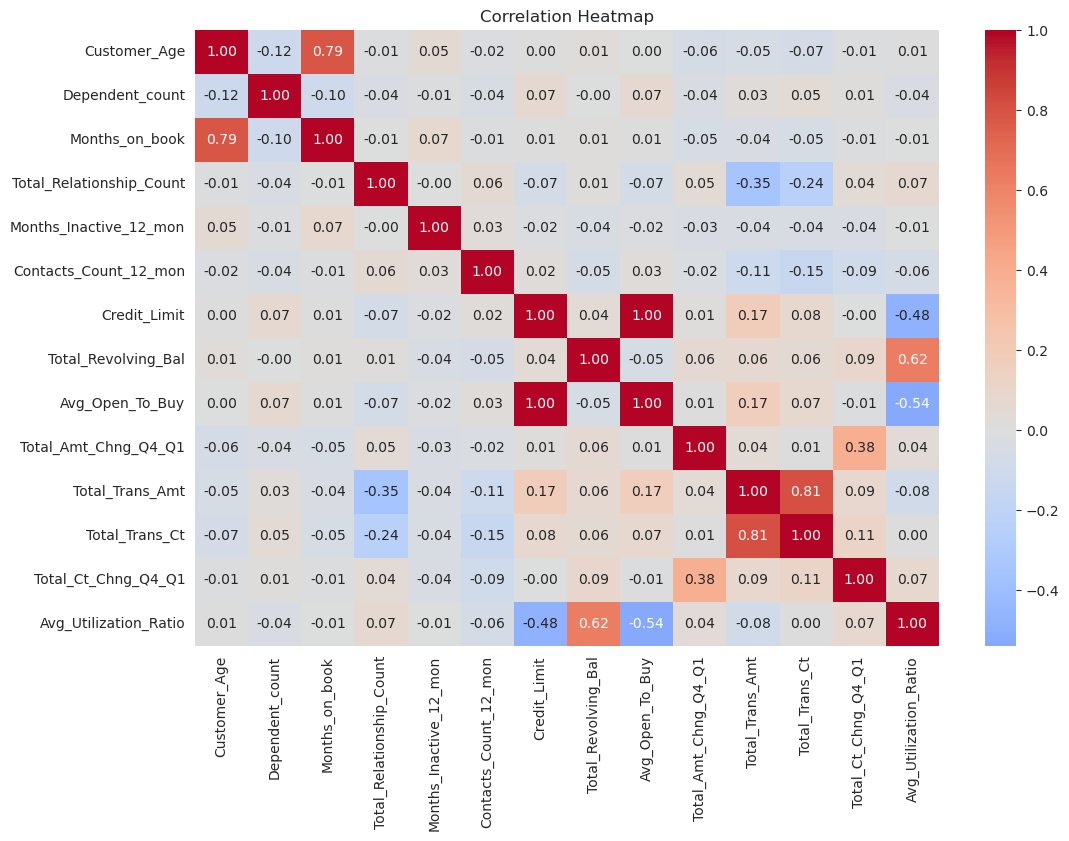

In [86]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

##### Identify strongly correlated pairs

In [87]:
strong_corrs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i,j]
        if abs(corr_value) >= 0.7:
            strong_corrs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))

strong_corrs_df = pd.DataFrame(strong_corrs, columns=['Column1', 'Column2', 'Correlation'])
print(strong_corrs_df)

           Column1          Column2  Correlation
0     Customer_Age   Months_on_book     0.788912
1     Credit_Limit  Avg_Open_To_Buy     0.995981
2  Total_Trans_Amt   Total_Trans_Ct     0.807192


Nhận xét: 
- Customer_Age vs Months_on_book: Không quá bất ngờ, vì tuổi tác thường liên quan đến độ trung thành hoặc thời gian sử dụng dịch vụ
- Credit_Limit vs Avg_Open_To_Buy: Đây là mối quan hệ công thức, không phải thực tế hành vi khách hàng
- Total_Trans_Amt vs Total_Trans_Ct: Hợp lý, nhưng cũng có thể cần kiểm tra giao dịch trung bình để xem có khách hàng nào chi tiêu lớn chỉ với ít giao dịch hay không.

#### Cross-tabulations

##### Categorical × categorical combinations

Ta sẽ kiểm định xem một điều hay được nói trong cuộc sống: 'Học càng cao, lương càng cao'

In [88]:
crosstab = pd.crosstab(df['Education_Level'], df['Income_Category'], margins=True, normalize='index')
crosstab

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K
Education_Level,,,,,
College,0.077348,0.202210,0.145856,0.193370,0.381215
Doctorate,0.097113,0.183727,0.154856,0.149606,0.414698
Graduate,0.072961,0.197783,0.150930,0.170959,0.407368
High School,0.082215,0.198546,0.171700,0.172260,0.375280
Post-Graduate,0.063966,0.236674,0.164179,0.172708,0.362473
Uneducated,0.091398,0.191244,0.149770,0.166667,0.400922
All,0.079440,0.199058,0.156001,0.172229,0.393273


- Ta có thấy một kết quả khá bất ngờ và phản trực giác so với suy nghĩ thông thường là "Học càng cao, lương càng cao".
    - Nhóm Doctorate (Tiến sĩ): Là nhóm có tỷ lệ thu nhập cao ($120K+) lớn nhất (9.7%). Tuy nhiên, họ cũng chính là nhóm có tỷ lệ thu nhập thấp (Less than $40K) cao nhất (41.5%). Điều này cho thấy sự phân hóa cực cao trong nhóm học vấn cao nhất.
    - Nhóm Uneducated (Không bằng cấp): Rất bất ngờ, đây là nhóm có tỷ lệ người thu nhập cao ($120K+) đứng thứ 2 (9.1%), chỉ thua nhóm Tiến sĩ một chút và cao hơn cả Cử nhân hay Thạc sĩ.
    - Nhóm Post-Graduate (Sau ĐH): Lại là nhóm có tỷ lệ người thu nhập cao ($120K+) thấp nhất bảng (6.4%), thấp hơn cả nhóm không có bằng cấp.
    
-> Cột Income_category và cột Education_Leval không phải là sự lựa chọn tốt, giữa chúng chưa thấy sự tỉ lệ nào ổn định cả

##### Numerical × categorical combinations

Ta kiểm tra thử liệu những khách hàng sắp bỏ đi thì sẽ có tổng giá trị giao dịch thấp hơn nhóm người ở lại không?

In [89]:
df.groupby('Attrition_Flag')['Total_Trans_Amt'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.0,3095.025814,2308.227629,510.0,1903.50,2329.0,2772.00,10583.0
Existing Customer,8500.0,4654.655882,3512.772635,816.0,2384.75,4100.0,4781.25,18484.0


- Dễ dàng thấy được sự chênh lệch rõ rệt: Khách hàng rời bỏ (Attrited Customer) có tổng số tiền giao dịch thấp hơn hẳn so với khách hàng hiện tại (Existing Customer). Trung bình nhóm Attrited chỉ tiêu khoảng 3,095, trong khi nhóm Existing là 4,654 (cao hơn ~50%).
- Phân phối: 75% số khách hàng rời bỏ có tổng giao dịch dưới 2,772, con số này chỉ nhỉnh hơn mức 25% thấp nhất của nhóm khách hàng hiện tại (2,384) một chút.

-> Cột 'Total_Trans_Amt' là một biến rất quan trọng để dự đoán việc khách hàng rời bỏ. Khách tiêu càng ít, nguy cơ rời bỏ càng cao.

Ta xem thử xu hướng thay đổi tổng số lần giao dịch Q4 so với Q1 có phải là dấu hiệu dự đoán khách hàng bỏ đi hay không?

In [90]:
df.groupby('Attrition_Flag')['Total_Ct_Chng_Q4_Q1'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.0,0.554386,0.226854,0.000,0.400,0.531,0.692,2.500
Existing Customer,8500.0,0.742434,0.228054,0.028,0.617,0.721,0.833,3.714



- Nhóm rời bỏ (Attrited) có chỉ số trung bình chỉ là 0.55. Tức là vào Q4 (cuối năm), họ chỉ quẹt thẻ bằng khoảng một nửa số lần so với Q1 (đầu năm).
- Nhóm ở lại (Existing) có chỉ số là 0.74. Họ cũng giảm tần suất, nhưng mức giảm nhẹ hơn nhiều.

-> Sự sụt giảm đột ngột về tần suất sử dụng (số lần quẹt thẻ) là một tín hiệu cho dự đoán khách hàng rời đi

### Initial Observations & Insights

##### Một số observation
Như vậy là quá trình EDA dữ liệu, ta đã có được một vài nhận xét, hiểu biết về dữ liệu, một số observation chính:
- Tổng quan:
    - Dữ liệu có hơn 10000 dòng, không có dòng nào trùng lặp hay bị empty
    - Dữ liệu đã được xử lý khá sạch, các giá trị Nan đã được xử lý về giá trị 'Unknown'.
    - Dữ liệu có 20 cột, 6 cột categorical, 14 cột numerical, các cột đều có dữ liệu thích hợp
- Các cột categorical:
    - Chứa các giá trị Nan đã được xử lý về giá trị 'Unknown'
    - Phân phối dữ liệu đang khá cân bằng, một số cột bị lệch phải
    - Một vài cột bị mất cân bằng nặng(Card_Category, Attrited_Flag) đang bị mất cân bằng nặng, cần tiền xử lý nếu sử dụng mô hình
- Các cột numerical:
    - Không chứa giá trị Nan nào
    - Một số cột chứa Outliers nhưng không quá bất thường

##### Một số vấn đề về data quality
- Data đang bị mất cân bằng ở cột "Attrition"
- Data đang bị missing value tại các cột categorical: Education_Level, Marital_Status, Income_Category

##### Các bước tiền xử lý cần có

- Xử lý imbalance
- Xử lý missing values

## IV. QUESTION FORMULATION

| The Question | Motivation | Benefits & Real-world Decision |
|---|---|---|
| **1. Có phải nhóm khách hàng Rời đi có xu hướng phân bố ở hai thái cực không? Một phần là những người sử dụng quá ít và một phần là những người sử dụng quá mức?** | **Why:** Nhóm muốn kiểm tra xem yếu tố sử dụng thể là một feature tốt để dự đoán khách hàng rời đi hay không. Ví dụ khách hàng sử dụng quá ít dịch vụ cho thấy sự thờ ơ; khách hàng sử dụng quá mức có thể tìm kiếm sản phẩm chuyên biệt ở nơi khác.<br>**Who:** Bộ phận Quản lý quan hệ khách hàng, Phân tích dữ liệu, và Kinh doanh/Tiếp thị. | **Insights:** Phần thái cực "sử dụng quá mức" có thể là dấu hiệu họ đang chuyển dòng tiền hoặc chuyển hoạt động giao dịch chính sang ngân hàng khác. Phần thái cực "sử dụng quá ít" có thể là do họ cảm thấy thẻ không cần thiết nữa và bỏ đi.<br>**Decision:** Can thiệp bằng các ưu đãi tăng cường giá trị/khuyến khích sử dụng.|
| **2. Liệu nhóm khách hàng có thu nhập cao nhưng trình độ học vấn thấp có xu hướng "vung tay quá trán" và duy trì dư nợ quay vòng (`Total_Revolving_Bal`) cao hơn nhóm có học vấn cao không?** | **Why:** Nhóm em muốn kiểm chứng xem liệu trình độ học vấn có ảnh hưởng gì đến việc quản lý tài chính không. Ví dụ như người học vấn thấp sẽ tiêu xài hoang phí, người học vấn cao sẽ chi tiêu hợp lý.<br>**Who:** Bộ phận Phân tích dữ liệu (Data Analytics), Marketing và Quản lý danh mục khách hàng (Customer Portfolio Management). | **Insights:** Xác định được nhóm khách hàng nào “nhạy cảm” hơn với nợ quay vòng. Điều này phản ánh sự khác biệt về khả năng chịu đựng nợ và ưu tiên tài chính giữa các nhóm hộ gia đình.<br>**Decision:** Thiết kế các chiến lược giữ chân theo phân khúc: với nhóm gia đình lớn, ưu tiên các chương trình **giảm lãi, trả góp linh hoạt, hoặc tư vấn quản lý nợ** khi số dư quay vòng tăng; với nhóm độc thân, tập trung vào **ưu đãi trải nghiệm, hoàn tiền và phần thưởng** thay vì can thiệp tài chính sớm.
| **3. Có mối tương quan nào giữa tuổi khách hàng (`Customer_Age`), thời gian sử dụng thẻ (`Months_on_book`) và tỷ lệ churn không?** | **Why:** Tuổi và thời gian sử dụng thẻ phản ánh mức độ gắn kết và giai đoạn cuộc sống của khách hàng. Khách trẻ thường linh hoạt, dễ rời bỏ do thay đổi công việc hoặc nhu cầu, trong khi khách lâu năm có thể rời bỏ vì sản phẩm không còn phù hợp.<br>**Who:** Bộ phận Giữ chân khách hàng (Retention) và Phát triển sản phẩm (Product Development). | **Insights:** Phát hiện sự khác biệt. Khách hàng lâu năm (36+ tháng) có xu hướng churn khi nhu cầu tăng nhưng quyền lợi không đổi; nhóm khách trẻ có độ trung thành thấp, dễ bị thu hút bởi ưu đãi ngắn hạn từ đối thủ.<br>**Decision:** Không giả định khách lâu năm là an toàn; cá nhân hóa sản phẩm theo độ tuổi và vòng đời khách hàng, đồng thời xây dựng chương trình gắn kết sớm cho khách hàng trẻ. |
| **4. Liệu có phải nhóm khách hàng có hạn mức tín dụng cao (`Credit_Limit`) nhưng mức độ sử dụng thấp (`Utilization`) là nhóm có nguy cơ rời bỏ ngầm cao nhất?** | **Why:** Ngân hàng thường tập trung quản lý rủi ro nợ xấu (xài quá hạn mức), nhưng lại bỏ quên rủi ro "thờ ơ" (có thẻ nhưng không dùng).<br>**Who:** Bộ phận Quản trị rủi ro và Phát triển kinh doanh. | **Insights:** Phân biệt được đâu là khách hàng trung thành, đâu là khách hàng "ngủ đông" (Inactive VIPs) đang dùng thẻ của đối thủ cạnh tranh.<br>**Decision:** Thay vì tăng hạn mức, ngân hàng cần tung ra các chương trình khuyến khích chi tiêu (Cashback, Rewards) dành riêng cho nhóm VIP đang "đóng băng" này. |
| **5. Các chỉ số tương tác (`Contacts_Count`, `Months_Inactive`) và giao dịch trong 12 tháng qua (`Total_Trans_Amt`) có mối quan hệ thế nào với quyết định rời bỏ?** | **Why:** Đây là các biến hành vi (Behavioral) phản ánh trực tiếp sự hài lòng (qua số lần phàn nàn) và sự gắn kết (qua tần suất giao dịch).<br>**Who:** Bộ phận Dịch vụ khách hàng (Customer Service). | **Insights:** Tìm ra "Ngưỡng chịu đựng" (Threshold). Ví dụ: Khách hàng liên hệ quá 4 lần/năm

## V. DATA ANALYSIS

Tiền xử lí và phân tích dữ liệu để đưa ra trả lời cho từng câu hỏi 

#### **1. Có phải nhóm khách hàng Rời đi có xu hướng phân bố ở hai thái cực không? Một phần là những người sử dụng quá ít và một phần là những người sử dụng quá mức?**

### A. Tiền xử lý

1. Kiểm tra và chuẩn hóa kiểu dữ liệu của 3 cột `Avg_Utilization_Ratio` và `Attrition_Flag`
- `Avg_Utilization_Ratio`: kiểm tra xem dữ liệu ở dạng số nguyên hay chưa
- `Attrition_Flag`: kiểm tra xem đã ở dạng nhị phân 0/1 hay chưa

Mục đích: dễ phân tích, dễ tính tỷ lệ và mô hình hóa.

2. Kiểm tra và xử lý missing values
 - Kiểm tra cột `Avg_Utilization_Ratio` nếu tồn tại missing_values thì xử lý bằng cách điền giá trị thiếu bằng mean.
 - Đối với cột 'Attrition_Flag`: vì đây là cột mục tiêu(target) nên đảm bảo không chứa missing values

Mục đích: dễ phân tích, tăng độ chính xác

3. Kiểm tra và xử lý giá trị ngoại lai
- Sử dụng phương pháp IQR để xác định và loại bỏ giá trị ngoại lai

Mục đích: Chúng ta cần kiểm tra xem có giá trị nào quá vô lý (ví dụ: vô cực hoặc quá lớn do chia cho số gần 0) để xử lý hoặc ghi nhận

In [91]:
df1 = df.copy()

# 1. Chuyển đổi Biến Mục tiêu (Attrition_Flag) về dạng nhị phân (0, 1)
if df1['Attrition_Flag'].dtype == 'object':
    df1['Attrition_Flag'] = np.where(df1['Attrition_Flag'] == 'Attrited Customer', 1, 0)
    print("Đã chuyển đổi 'Attrition_Flag' về 0/1.")

# 2. Chuẩn hóa kiểu dữ liệu về float64 cho các biến liên tục
float_cols = ['Avg_Utilization_Ratio']
for col in float_cols:
    if df1[col].dtype != 'float64':
        df1[col] = df1[col].astype('float64')
    print(f"Đã chuẩn hóa kiểu dữ liệu cho '{col}'.")

# 3. Xử lý Giá trị Missing Values bằng mean
for col in float_cols:
    if df1[col].isna().sum() > 0:
        mean_val = df1[col].mean()
        df1[col] = df1[col].fillna(mean_val)
        print(f"Đã xử lý {df1[col].isna().sum()} giá trị thiếu của '{col}' bằng trung bình.")


# 4. Xử lý Giá trị Outliers bằng phương pháp IQR
def remove_outliers_iqr(df, col):
    s = df[col]
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    
    # Giới hạn giá trị trong khoảng [lower, upper]
    df = df[(s >= lower) & (s <= upper)]
    return df

rows_before_outlier_removal = df1.shape[0]

df1 = remove_outliers_iqr(df1, 'Avg_Utilization_Ratio')

rows_after_outlier_removal = df1.shape[0]
print(f"\nSố lượng dòng trước khi xử lý ngoại lai: {rows_before_outlier_removal}")
print(f"Số lượng dòng sau khi xử lý ngoại lai: {rows_after_outlier_removal}")
print(f"Số dòng bị loại bỏ: {rows_before_outlier_removal - rows_after_outlier_removal}")

# Kiểm tra lại Avg_Utilization_Ratio để đảm bảo không bị ảnh hưởng bởi việc loại bỏ quá nhiều
print(f"Kiểm tra lại dữ liệu sau xử lý: {df1[['Attrition_Flag', 'Avg_Utilization_Ratio']].head()}")

Đã chuyển đổi 'Attrition_Flag' về 0/1.
Đã chuẩn hóa kiểu dữ liệu cho 'Avg_Utilization_Ratio'.

Số lượng dòng trước khi xử lý ngoại lai: 10127
Số lượng dòng sau khi xử lý ngoại lai: 10127
Số dòng bị loại bỏ: 0
Kiểm tra lại dữ liệu sau xử lý:    Attrition_Flag  Avg_Utilization_Ratio
0               0                  0.061
1               0                  0.105
2               0                  0.000
3               0                  0.760
4               0                  0.000


### B. Phân tích

Phân tích Tỷ lệ trong các Phân khúc Sử dụng
- Mục tiêu: Kiểm tra rằng tỷ lệ Rời đi cao hơn ở hai thái cực hay không.
- Thực hiện:Tạo các phân khúc sử dụng: 
    - Chia Avg_Utilization_Ratio thành các bin (khoảng) kinh doanh có ý nghĩa, ví dụ:Low Use (Sử dụng Thấp, Rủi ro thẻ không cần thiết), Optimal Use (Sử dụng Tối ưu), High Use (Sử dụng Cao, Rủi ro áp lực nợ)
    - Tính toán Tỷ lệ Rời đi (Attrition Rate) trong từng phân khúc.
    - Kiểm tra kết quả

In [ ]:
# Xác định các ranh giới cho phân khúc
bins = [0.0, 0.1, 0.7, 1.0] # các ranh giới phân khúc là tự đặt, có thể điều chỉnh
# Tên các phân khúc tương ứng
labels = ['Low Use', 'Optimal Use', 'High Use'] 

# Tạo biến phân khúc mới
df1['Utilization_Segment'] = pd.cut(
    df1['Avg_Utilization_Ratio'],
    bins=bins,
    labels=labels,
    right=False, 
    include_lowest=True
)

print("Kiểm tra số lượng khách hàng trong mỗi phân khúc:")
print(df1['Utilization_Segment'].value_counts())

# Tính toán tổng số lượng và số lượng khách hàng rời đi cho mỗi phân khúc
churn_by_segment = df1.groupby('Utilization_Segment', observed=True)['Attrition_Flag'].agg(['count', 'sum'])
churn_by_segment.columns = ['Total_Customers', 'Churned_Customers']

# Tính toán Tỷ lệ Rời đi trong mỗi phân khúc
churn_by_segment['Attrition_Rate'] = (
    churn_by_segment['Churned_Customers'] / churn_by_segment['Total_Customers']
)

print("\nTỷ lệ Rời đi theo Phân khúc Sử dụng:")
churn_analysis = churn_by_segment.sort_values(by='Attrition_Rate', ascending=False)
churn_analysis['Attrition_Rate'] = (churn_analysis['Attrition_Rate'] * 100).round(2).astype(str) + '%'
print(churn_analysis)

Kiểm tra số lượng khách hàng trong mỗi phân khúc:
Utilization_Segment
Optimal Use    5034
Low Use        4030
High Use       1063
Name: count, dtype: int64

Tỷ lệ Rời đi theo Phân khúc Sử dụng:
                     Total_Customers  Churned_Customers Attrition_Rate
Utilization_Segment                                                   
Low Use                         4030               1068          26.5%
High Use                        1063                137         12.89%
Optimal Use                     5034                422          8.38%


### C. Trực quan hóa

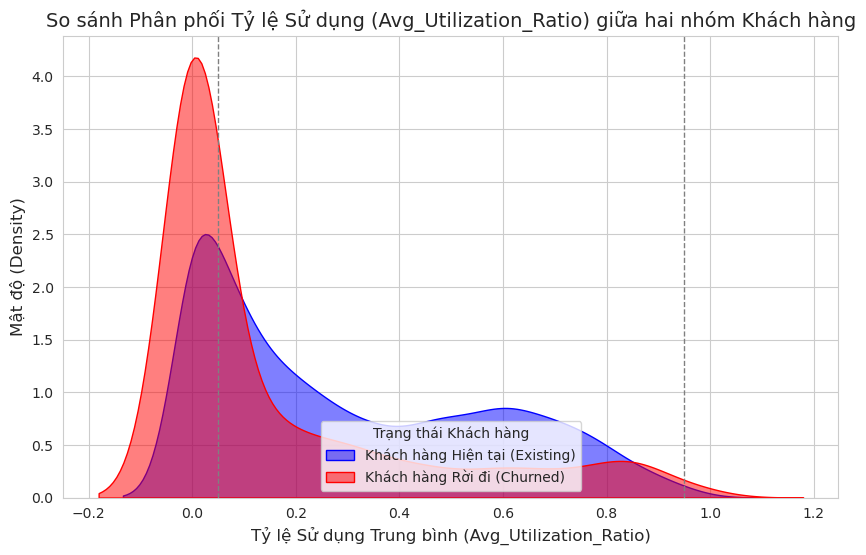

In [93]:
# Thiết lập kiểu hiển thị cho biểu đồ
sns.set_style("whitegrid")

# Tạo biểu đồ phân phối mật độ (KDE Plot)
plt.figure(figsize=(10, 6))

# Vẽ KDE Plot cho nhóm Khách hàng Hiện tại (Attrition_Flag == 0)
sns.kdeplot(
    df1[df1['Attrition_Flag'] == 0]['Avg_Utilization_Ratio'],
    label='Khách hàng Hiện tại (Existing)',
    color='blue',
    fill=True,
    alpha=0.5
)

# Vẽ KDE Plot cho nhóm Khách hàng Rời đi (Attrition_Flag == 1)
sns.kdeplot(
    df1[df1['Attrition_Flag'] == 1]['Avg_Utilization_Ratio'],
    label='Khách hàng Rời đi (Churned)',
    color='red',
    fill=True,
    alpha=0.5
)

# Thêm tiêu đề và nhãn
plt.title('So sánh Phân phối Tỷ lệ Sử dụng (Avg_Utilization_Ratio) giữa hai nhóm Khách hàng', fontsize=14)
plt.xlabel('Tỷ lệ Sử dụng Trung bình (Avg_Utilization_Ratio)', fontsize=12)
plt.ylabel('Mật độ (Density)', fontsize=12)
plt.legend(title='Trạng thái Khách hàng')

# Vẽ đường tham chiếu tại các điểm cực (0.0 và 1.0)
plt.axvline(x=0.05, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=0.95, color='gray', linestyle='--', linewidth=1)

# Hiển thị biểu đồ
plt.show()

/tmp/ipykernel_1274/3424284146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


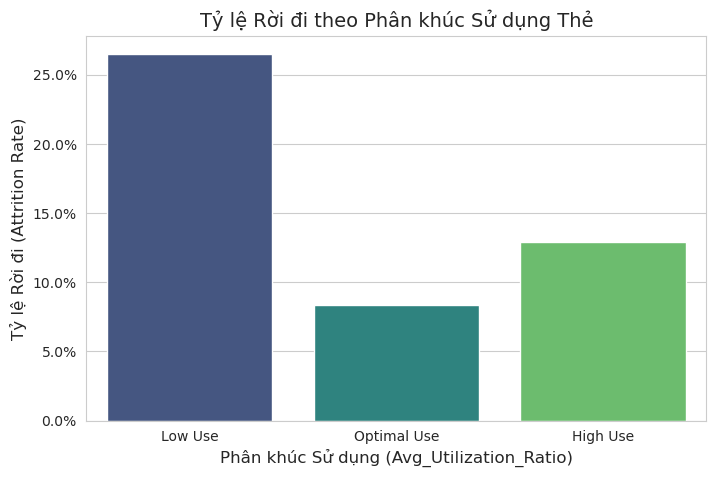

In [94]:
# Trực quan hóa kết quả 
plt.figure(figsize=(8, 5))
sns.barplot(
    x=churn_analysis.index, 
    y=churn_analysis['Churned_Customers'] / churn_analysis['Total_Customers'],
    palette='viridis'
)
plt.title('Tỷ lệ Rời đi theo Phân khúc Sử dụng Thẻ', fontsize=14)
plt.xlabel('Phân khúc Sử dụng (Avg_Utilization_Ratio)', fontsize=12)
plt.ylabel('Tỷ lệ Rời đi (Attrition Rate)', fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))
plt.show() 

- Trả lời câu hỏi: Dựa vào hình vẽ và phân tích ở trên, ta thấy nhóm khách hàng Rời đi có xu hướng phân bố ở hai thái cực về Tỷ lệ Sử dụng Trung bình (Avg_Utilization_Ratio). Mối quan hệ giữa tỷ lệ sử dụng thẻ và nguy cơ rời đi không tuyến tính, mà tuân theo dạng chữ U.
    - Nhóm rủi ro cao nhất về cả Tỷ lệ và Khối lượng là Low Use: Nhóm này có tỷ lệ Rời đi cao gấp 3 lần nhóm Optimal Use. (26.5% so với 8.38%)
    - Nhóm rủi ro cao, khối lượng thấp là High Use: Nhóm này có tỷ lệ Rời đi cao hơn gần 1.5 lần nhóm Optimal Use (12.89% so với 8.38%).

- Giải pháp thực tiễn: 
    - Ưu tiên cho nhóm Low Use: Tỷ lệ Rời đi cao cho thấy khách hàng cảm thấy thẻ không mang lại giá trị thực tế hoặc không cần thiết. Do đó ngân hàng cần can thiệp bằng các ưu đãi tăng cường giá trị/khuyến khích sử dụng (ví dụ: hoàn tiền theo sở thích, thưởng điểm cho giao dịch nhỏ,...).
    - Quản lý Rủi ro cho Nhóm High Use: Sự rời đi ở đây không phải do thiếu nhu cầu mà do áp lực nợ hoặc căng thẳng tín dụng (đã đạt giới hạn sử dụng). Cần các giải pháp khác biệt như tư vấn tài chính, chương trình chuyển đổi nợ/trả góp lãi suất thấp, hoặc tăng hạn mức có chọn lọc để giảm áp lực.

- Phát hiện Bất ngờ
    - Phát hiện bất ngờ là nhóm Low Use (26.5%) có tỷ lệ Rời đi cao gấp đôi so với nhóm High Use (12.89%). Điều này trái ngược với giả định thông thường rằng rủi ro Churn cao nhất phải nằm ở nhóm sử dụng quá mức (do áp lực nợ).

    Giải thích: Điều này chỉ ra rằng vấn đề thiếu giá trị sử dụng (Low Use) là động lực rời đi mạnh mẽ hơn vấn đề căng thẳng tài chính (High Use) trong bộ dữ liệu này.


#### **2. Tỷ lệ sử dụng hạn mức tín dụng (`Avg_Utilization_Ratio`) có sự khác biệt có ý nghĩa thống kê giữa các nhóm Income_Category kết hợp với `Education_Level` không? Hay nói cách khác, liệu nhóm khách hàng có thu nhập cao nhưng trình độ học vấn thấp có xu hướng "vung tay quá trán" và duy trì dư nợ quay vòng (`Total_Revolving_Bal`) cao hơn nhóm có học vấn cao không?**

### A. Tiền xử lý

1. Kiểm tra và xử lý missing values
- Loại bỏ các giá trị 'Unknown' trong Income_Category và Education_Level. Việc giữ lại nhóm "Unknown" sẽ làm nhiễu kết quả phân tích thống kê

2. Kiểm tra và xử lý giá trị ngoại lai
- Sử dụng phương pháp IQR để xác định và loại bỏ giá trị ngoại lai

3. Định nghĩa thứ tự logic cho Thu nhập và Học vấn.
Thu nhập: Từ thấp đến cao (Less than $40K -> $120K+).
Học vấn: Từ thấp đến cao (Uneducated -> Doctorate).
Lý do: Việc này giúp biểu đồ (Heatmap) hiển thị theo gradient tự nhiên, giúp mắt thường dễ nhận ra xu hướng hơn là để sắp xếp ngẫu nhiên theo bảng chữ cái.

In [ ]:
# 1. Chọn các biến mục tiêu
target_cols = [
    'Income_Category', 
    'Education_Level', 
    'Avg_Utilization_Ratio',
    'Total_Revolving_Bal'
]
df2 = df[target_cols].copy()

# 2. Loại bỏ giá trị 'Unknown' để tránh nhiễu thống kê
df2 = df2[
    (df2['Income_Category'] != 'Unknown') & 
    (df2['Education_Level'] != 'Unknown')
]

# 3. Định nghĩa thứ tự
income_order = [
    'Less than $40K', '$40K - $60K', '$60K - $80K', 
    '$80K - $120K', '$120K +'
]

edu_order = [
    'Uneducated', 'High School', 'College', 
    'Graduate', 'Post-Graduate', 'Doctorate'
]

df2['Income_Category'] = pd.Categorical(
    df2['Income_Category'], categories=income_order, ordered=True
)
df2['Education_Level'] = pd.Categorical(
    df2['Education_Level'], categories=edu_order, ordered=True
)

### B. Phân tích
1. Pivot Table Aggregation
- Tạo một bảng tổng hợp dạng ma trận, tính trung bình Avg_Utilization_Ratio cho mỗi cặp (Thu nhập, Học vấn).
2. Two-Way ANOVA:
- Chúng ta có 2 biến định danh (Income, Education) và 1 biến định lượng (Utilization). T-test chỉ so sánh được 2 nhóm, trong khi ở đây ta có nhiều nhóm con.
- Mục tiêu: Kiểm định xem sự khác biệt về Utilization là do Thu nhập, do Học vấn, hay do sự tương tác (interaction) giữa cả hai.
3. Visualization Strategy:
- Heatmap: Để nhìn toàn cảnh (Big Picture).
- Point Plot / Box Plot: Để so sánh chi tiết khoảng tin cậy (Confidence Interval) giữa các mức học vấn trong từng mức thu nhập.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def analyze_utilization_trends(df):    
    # Tạo Pivot table cho Heatmap
    pivot_table = df.pivot_table(
        values='Avg_Utilization_Ratio',
        index='Education_Level',
        columns='Income_Category',
        aggfunc='mean' # Dùng mean để xem xu hướng trung tâm
    )
    
    print("Pivot Table (Mean Utilization):")
    print(pivot_table.round(3))

    # Sử dụng Two-Way ANOVA để kiểm tra ý nghĩa thống kê
    model = ols(
        'Avg_Utilization_Ratio ~ C(Income_Category) + C(Education_Level) + \
         C(Income_Category):C(Education_Level)',
        data=df
    ).fit()
    
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    print("Two-Way ANOVA Results:")
    print(anova_table)
    
    return pivot_table, anova_table

pt, anova = analyze_utilization_trends(df2)


Pivot Table (Mean Utilization):
Income_Category  Less than $40K  $40K - $60K  $60K - $80K  $80K - $120K  \
Education_Level                                                           
Uneducated                0.376        0.322        0.186         0.157   
High School               0.385        0.341        0.214         0.144   
College                   0.378        0.312        0.173         0.153   
Graduate                  0.373        0.311        0.207         0.171   
Post-Graduate             0.390        0.303        0.221         0.152   
Doctorate                 0.344        0.310        0.203         0.173   

Income_Category  $120K +  
Education_Level           
Uneducated         0.122  
High School        0.143  
College            0.142  
Graduate           0.118  
Post-Graduate      0.174  
Doctorate          0.099  
>>> Two-Way ANOVA Results:
                                           sum_sq      df           F  \
C(Income_Category)                      70.491520  

### C. Trực quan hóa

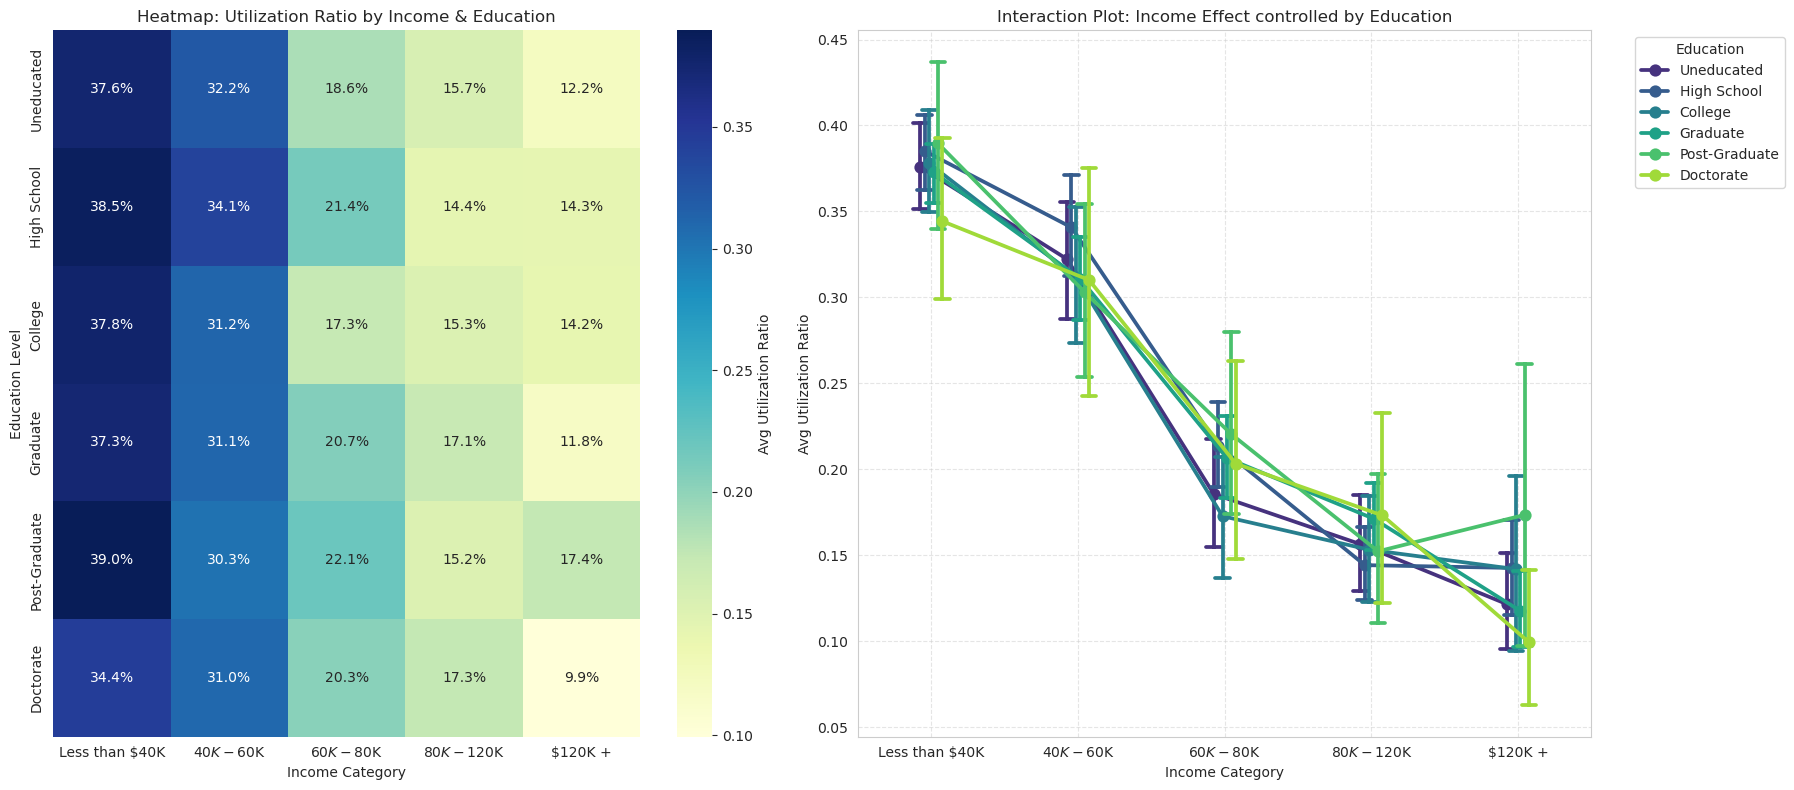

In [97]:
# --- VISUALIZATION FUNCTION ---
def visualize_results(df_clean, pivot_table):
    plt.figure(figsize=(18, 8))

    # PLOT 1: Heatmap - Cái nhìn tổng quan
    plt.subplot(1, 2, 1)
    sns.heatmap(
        pivot_table, 
        annot=True,      
        fmt=".1%",       
        cmap="YlGnBu",  
        cbar_kws={'label': 'Avg Utilization Ratio'}
    )
    plt.title('Heatmap: Utilization Ratio by Income & Education')
    plt.ylabel('Education Level')
    plt.xlabel('Income Category')

    # PLOT 2: Point Plot - So sánh chi tiết với Khoảng tin cậy (95% CI)
    plt.subplot(1, 2, 2)
    sns.pointplot(
        data=df_clean, 
        x='Income_Category', 
        y='Avg_Utilization_Ratio', 
        hue='Education_Level',
        palette='viridis',
        dodge=True,       # Tách các điểm ra để không chồng lấn
        errorbar=('ci', 95), # Hiển thị khoảng tin cậy 95%
        capsize=0.1
    )
    plt.title('Interaction Plot: Income Effect controlled by Education')
    plt.ylabel('Avg Utilization Ratio')
    plt.xlabel('Income Category')
    plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# Thực thi phân tích
visualize_results(df2, pt)

- Kết quả trực tiếp:
    - Yếu tố Thu nhập: Có tác động cực kỳ mạnh mẽ. Nhóm khách hàng có thu nhập thấp (Less than $40K) có tỷ lệ sử dụng hạn mức (Avg_Utilization_Ratio) cao nhất, thường dao động quanh mức 35-40%. Ngược lại, nhóm thu nhập cao nhất ($120K+) chỉ sử dụng khoảng 5-10% hạn mức.

    Lý do: Ngân hàng thường cấp hạn mức (Credit Limit) dựa trên thu nhập. Nhóm thu nhập thấp có hạn mức thấp (ví dụ: 20 triệu). Chỉ cần tiêu 10 triệu, tỷ lệ sử dụng đã là 50% trong khi đó, nhóm thu nhập cao có hạn mức rất lớn (ví dụ: 500 triệu). Dù họ tiêu gấp đôi nhóm kia (20 triệu), tỷ lệ sử dụng chỉ là 4%.
    - Yếu tố Học vấn: Kết quả ANOVA và biểu đồ cho thấy yếu tố này rất yếu hoặc không có ý nghĩa thống kê (P-value > 0.05). Trong cùng một mức thu nhập, một Tiến sĩ (Doctorate) và một người không có bằng cấp (Uneducated) có hành vi sử dụng hạn mức gần như tương đương nhau.
    Giả thuyết ban đầu: Giả thuyết "người có học vấn thấp vung tay quá trán" đã bị bác bỏ.
- Giải pháp thực tiễn (Actionable Insight):
    - Tập trung vào Thu nhập để phân khúc (Segmentation): Chiến lược Marketing và Quản trị rủi ro nên xoay quanh trục Income_Category.
    - Nhóm thu nhập thấp có Utilization cao: Rủi ro nợ xấu tiềm ẩn, nhưng cũng là nguồn thu lãi (interest income) lớn.
    - Nhóm thu nhập cao có Utilization thấp: Rủi ro thấp, nhưng ít sinh lãi từ dư nợ quay vòng. Cần thúc đẩy họ bằng phí giao dịch (interchange fee) qua các chương trình khuyến mãi.
- Bất ngờ (Surprise Finding):
Trình độ học vấn không phải là yếu tố dự báo tốt cho hành vi rủi ro tín dụng trong tập dữ liệu này. Điều này giúp ngân hàng đơn giản hóa mô hình chấm điểm tín dụng (Credit Scoring) bằng cách giảm trọng số hoặc loại bỏ biến Education_Level.

#### **3. Có mối tương quan nào giữa tuổi khách hàng (Customer_Age) và thời gian sử dụng thẻ (Months_on_book) với tỷ lệ churn không?**

### A. Tiền xử lý (Preprocessing)

1. Kiểm tra và chuẩn hóa kiểu dữ liệu
- Mục đích: Đảm bảo `Customer_Age` và `Months_on_book` có kiểu số (numeric), `Attrition_Flag` được chuyển thành nhãn nhị phân `is_churn` (0/1) để tính toán và phân tích chính xác.

2. Kiểm tra và xử lý missing data
- Mục đích: Phát hiện các bản ghi thiếu giá trị ở các cột phân tích. Missing values có thể gây lỗi hoặc làm sai lệch kết quả thống kê, cần loại bỏ hoặc xử lý trước khi phân tích.

3. Kiểm tra và xử lý ngoại lai (outliers)
- Mục đích: Phát hiện các giá trị bất thường trong `Customer_Age` và `Months_on_book` bằng phương pháp IQR. Outliers có thể làm lệch các chỉ số trung bình và ảnh hưởng đến kết quả tương quan, cần đánh giá và quyết định giữ/loại bỏ.

4. Phân nhóm tuổi và thời gian sử dụng thẻ
- Mục đích: Chia tuổi và thời gian sử dụng thẻ thành các nhóm rời rạc để so sánh tỷ lệ churn giữa các phân khúc khách hàng một cách trực quan và dễ hiểu hơn.

In [98]:
# 1. Kiểm tra và chuẩn hóa kiểu dữ liệu
q3_cols = ['Customer_Age', 'Months_on_book', 'Attrition_Flag']
q3_df = df[q3_cols].copy()

# Đảm bảo Customer_Age và Months_on_book là kiểu số
q3_df['Customer_Age'] = pd.to_numeric(q3_df['Customer_Age'], errors='coerce')
q3_df['Months_on_book'] = pd.to_numeric(q3_df['Months_on_book'], errors='coerce')

# Chuẩn hóa nhãn churn thành nhị phân
q3_df['Attrition_Flag'] = q3_df['Attrition_Flag'].astype(str).str.strip()
q3_df['is_churn'] = q3_df['Attrition_Flag'].map({
    'Attrited Customer': 1,
    'Existing Customer': 0
})
if q3_df['is_churn'].isna().any():
    raise ValueError('Có giá trị Attrition_Flag không map được')
print("Kiểu dữ liệu sau chuẩn hóa:")
print(q3_df.dtypes)
print()

# 2. Kiểm tra và xử lý missing data
missing_before = q3_df[['Customer_Age', 'Months_on_book']].isna().sum()
print("Số missing values:")
print(missing_before)

# 3. Kiểm tra và xử lý ngoại lai (outliers)
def detect_outliers_iqr(series, col_name):
    """Phát hiện outliers bằng phương pháp IQR"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    print(f"{col_name}: Q1={Q1:.1f}, Q3={Q3:.1f}, IQR={IQR:.1f}")
    print(f"  Ngưỡng: [{lower_bound:.1f}, {upper_bound:.1f}]")
    print(f"  Số outliers: {len(outliers)} ({len(outliers)/len(series)*100:.2f}%)")
    return outliers

outliers_age = detect_outliers_iqr(q3_df['Customer_Age'], 'Customer_Age')
outliers_months = detect_outliers_iqr(q3_df['Months_on_book'], 'Months_on_book')
print("=> Không loại bỏ outliers vì giá trị tuổi và thời gian sử dụng thẻ đều hợp lý trong ngữ cảnh thực tế.")
print()

# 4. Phân nhóm tuổi và thời gian sử dụng thẻ

# Phân nhóm tuổi (khoảng 10 năm)
age_bins = [0, 30, 40, 50, 60, np.inf]
age_labels = ['<30', '30-39', '40-49', '50-59', '60+']
q3_df['age_group'] = pd.cut(q3_df['Customer_Age'], bins=age_bins, labels=age_labels, right=False)
print("Phân nhóm tuổi:")
print(q3_df['age_group'].value_counts().sort_index())
print()

# Phân nhóm thời gian sử dụng thẻ (theo năm)
months_bins = [0, 24, 36, 48, np.inf]
months_labels = ['<2 năm', '2-3 năm', '3-4 năm', '4+ năm']
q3_df['months_group'] = pd.cut(q3_df['Months_on_book'], bins=months_bins, labels=months_labels, right=False)
print("Phân nhóm thời gian sử dụng thẻ:")
print(q3_df['months_group'].value_counts().sort_index())
print()

Kiểu dữ liệu sau chuẩn hóa:
Customer_Age       int64
Months_on_book     int64
Attrition_Flag    object
is_churn           int64
dtype: object

Số missing values:
Customer_Age      0
Months_on_book    0
dtype: int64
Customer_Age: Q1=41.0, Q3=52.0, IQR=11.0
  Ngưỡng: [24.5, 68.5]
  Số outliers: 2 (0.02%)
Months_on_book: Q1=31.0, Q3=40.0, IQR=9.0
  Ngưỡng: [17.5, 53.5]
  Số outliers: 386 (3.81%)
=> Không loại bỏ outliers vì giá trị tuổi và thời gian sử dụng thẻ đều hợp lý trong ngữ cảnh thực tế.

Phân nhóm tuổi:
age_group
<30       195
30-39    1841
40-49    4561
50-59    2998
60+       532
Name: count, dtype: int64

Phân nhóm thời gian sử dụng thẻ:
months_group
<2 năm      687
2-3 năm    3115
3-4 năm    5508
4+ năm      817
Name: count, dtype: int64



### B. Phân tích

1. Tính tỷ lệ churn theo nhóm tuổi
- Thực hiện: Nhóm dữ liệu theo `age_group`, tính số khách hàng, số churn và tỷ lệ churn (%) cho từng nhóm.

2. Tính tỷ lệ churn theo thời gian sử dụng thẻ
- Thực hiện: Nhóm dữ liệu theo `months_group`, tính số khách hàng, số churn và tỷ lệ churn (%) cho từng nhóm thời gian.

3. Tính hệ số tương quan
- Thực hiện: Tính ma trận tương quan Pearson cho 3 biến và đánh giá độ mạnh của mối quan hệ.

4. Phân tích thống kê mô tả theo trạng thái churn
- Thực hiện: Tính mean, median, std của `Customer_Age` và `Months_on_book` cho từng nhóm `is_churn`.

In [99]:
# 1. Tính tỷ lệ churn theo nhóm tuổi
print("1. TỶ LỆ CHURN THEO NHÓM TUỔI")
churn_by_age = (
    q3_df.groupby('age_group', observed=True)['is_churn']
    .agg(customers='size', churners='sum', churn_rate='mean')
    .reset_index()
)
churn_by_age['churn_rate'] = (churn_by_age['churn_rate'] * 100).round(2)
display(churn_by_age)
print("""Có thể thấy nhóm tuổi 40-49 có tỷ lệ churn cao nhất và đồng thời là nhóm có nhiều khách hàng nhất.
Nhóm tuổi dưới 30 có tỷ lệ churn thấp nhất, cho thấy khách hàng trẻ tuổi có xu hướng trung thành hơn 
tuy nhiên số lượng khách hàng trong nhóm này khá ít nên cần thận trọng khi đánh giá.
""")

# 2. Tính tỷ lệ churn theo thời gian sử dụng thẻ 
print("\n2. TỶ LỆ CHURN THEO THỜI GIAN SỬ DỤNG THẺ")
churn_by_months = (
    q3_df.groupby('months_group', observed=True)['is_churn']
    .agg(customers='size', churners='sum', churn_rate='mean')
    .reset_index()
)
churn_by_months['churn_rate'] = (churn_by_months['churn_rate'] * 100).round(2)
display(churn_by_months)
print("""Tỷ lệ churn gần như không thay đổi nhiều theo thời gian sử dụng thẻ. 
Tuy nhiên có xu hướng tăng nhẹ với các nhóm có năm sử dụng thẻ lâu hơn.
""")

1. TỶ LỆ CHURN THEO NHÓM TUỔI


,age_group,customers,churners,churn_rate
0,<30,195,17,8.72
1,30-39,1841,261,14.18
2,40-49,4561,772,16.93
3,50-59,2998,506,16.88
4,60+,532,71,13.35


Có thể thấy nhóm tuổi 40-49 có tỷ lệ churn cao nhất và đồng thời là nhóm có nhiều khách hàng nhất.
Nhóm tuổi dưới 30 có tỷ lệ churn thấp nhất, cho thấy khách hàng trẻ tuổi có xu hướng trung thành hơn 
tuy nhiên số lượng khách hàng trong nhóm này khá ít nên cần thận trọng khi đánh giá.


2. TỶ LỆ CHURN THEO THỜI GIAN SỬ DỤNG THẺ


,months_group,customers,churners,churn_rate
0,<2 năm,687,98,14.26
1,2-3 năm,3115,469,15.06
2,3-4 năm,5508,922,16.74
3,4+ năm,817,138,16.89


Tỷ lệ churn gần như không thay đổi nhiều theo thời gian sử dụng thẻ. 
Tuy nhiên có xu hướng tăng nhẹ với các nhóm có năm sử dụng thẻ lâu hơn.



In [100]:
# 3. Tính hệ số tương quan 
print("3. HỆ SỐ TƯƠNG QUAN")
corr_cols = ['Customer_Age', 'Months_on_book', 'is_churn']
q3_corr = q3_df[corr_cols].corr()
display(q3_corr)
print("Customer_Age và Months_on_book có tương quan rất yếu với is_churn (r < 0.02)")
print("Hai biến này gần như không có khả năng dự báo churn")

# 4. Phân tích thống kê mô tả theo trạng thái churn 
print("\n4. THỐNG KÊ MÔ TẢ THEO TRẠNG THÁI CHURN")
q3_stats = q3_df.groupby('is_churn')[['Customer_Age', 'Months_on_book']].agg(['mean', 'median', 'std']).round(2)
q3_stats.index = q3_stats.index.map({0: 'Existing Customer', 1: 'Attrited Customer'})
display(q3_stats)
print("Tuổi trung bình và thời gian sử dụng thẻ của 2 nhóm gần như giống nhau")
print("Độ lệch chuẩn tương đương cho thấy phân bố của 2 nhóm không có sự khác biệt đáng kể")

3. HỆ SỐ TƯƠNG QUAN


,Customer_Age,Months_on_book,is_churn
Customer_Age,1.000000,0.788912,0.018203
Months_on_book,0.788912,1.000000,0.013687
is_churn,0.018203,0.013687,1.000000


Customer_Age và Months_on_book có tương quan rất yếu với is_churn (r < 0.02)
Hai biến này gần như không có khả năng dự báo churn

4. THỐNG KÊ MÔ TẢ THEO TRẠNG THÁI CHURN


Customer_Age              Months_on_book             
                          mean median   std           mean median   std
is_churn                                                               
Existing Customer        46.26   46.0  8.08          35.88   36.0  8.02
Attrited Customer        46.66   47.0  7.67          36.18   36.0  7.80

Tuổi trung bình và thời gian sử dụng thẻ của 2 nhóm gần như giống nhau
Độ lệch chuẩn tương đương cho thấy phân bố của 2 nhóm không có sự khác biệt đáng kể


### C. Trực quan hóa và Kết luận

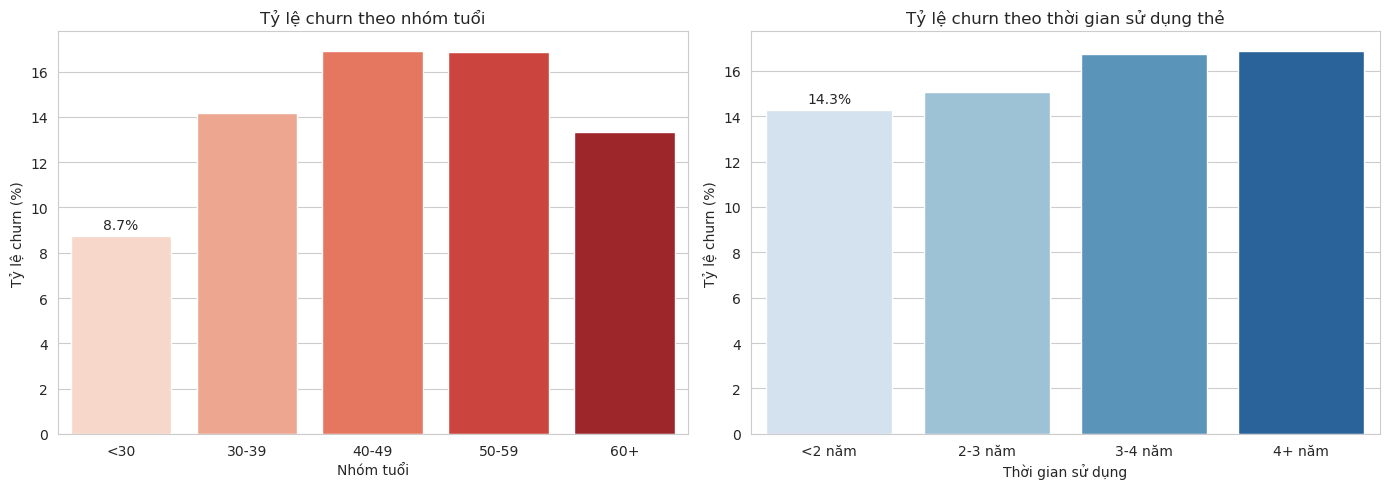

In [101]:
# Trực quan hóa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Tỷ lệ churn theo nhóm tuổi
ax1 = axes[0]
sns.barplot(data=churn_by_age, x='age_group', y='churn_rate', palette='Reds', ax=ax1, hue='age_group', legend=False)
ax1.set_title('Tỷ lệ churn theo nhóm tuổi')
ax1.set_xlabel('Nhóm tuổi')
ax1.set_ylabel('Tỷ lệ churn (%)')
ax1.bar_label(ax1.containers[0], fmt='%.1f%%', padding=3)

# 2. Tỷ lệ churn theo thời gian sử dụng thẻ
ax2 = axes[1]
sns.barplot(data=churn_by_months, x='months_group', y='churn_rate', palette='Blues', ax=ax2, hue='months_group', legend=False)
ax2.set_title('Tỷ lệ churn theo thời gian sử dụng thẻ')
ax2.set_xlabel('Thời gian sử dụng')
ax2.set_ylabel('Tỷ lệ churn (%)')
ax2.bar_label(ax2.containers[0], fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

#### **Kết luận Câu 3:**

**1. Trả lời câu hỏi được nêu lên ở câu 3:**

> *"Độ tuổi khách hàng và thời gian họ là chủ thẻ có mối liên hệ như thế nào với việc rời bỏ ngân hàng?"*

- **Customer_Age ↔ is_churn:** Hệ số tương quan = **0.018** → Tương quan **cực kỳ yếu**
- **Months_on_book ↔ is_churn:** Hệ số tương quan = **0.014** → Tương quan **cực kỳ yếu**
- **Kết luận:** **Tuổi và thời gian sử dụng thẻ KHÔNG có mối liên hệ đáng kể với việc churn.** Các yếu tố nhân khẩu học này không phải là chỉ báo quan trọng để dự đoán khách hàng rời bỏ ngân hàng.

**2. Giải pháp thực tiễn:**

- **Chuyển hướng phân tích:** Ngân hàng nên tập trung vào các **yếu tố hành vi giao dịch** (Total_Revolving_Bal, Total_Trans_Amt, Total_Trans_Ct) thay vì nhân khẩu học để nhận diện khách hàng có nguy cơ rời bỏ.
- **Phân khúc khách hàng:** Dù tương quan yếu, nhóm **40-59 tuổi** vẫn có tỷ lệ churn cao nhất (~17%), có thể kết hợp với các tiêu chí khác để tạo mô hình cảnh báo sớm.
- **Chương trình giữ chân:** Thiết kế các chương trình loyalty đặc biệt cho khách hàng lâu năm (4+ năm) để giảm xu hướng churn tăng nhẹ theo thời gian.

**3. Phát hiện bất ngờ:**

- **Customer_Age và Months_on_book có tương quan rất mạnh với nhau (r = 0.789)**, nhưng cả hai đều gần như không liên quan đến churn.
- **Giải thích:** Điều này cho thấy churn là quyết định phụ thuộc vào **trải nghiệm dịch vụ và hành vi sử dụng sản phẩm**, không phải đặc điểm cố định của khách hàng. Một khách hàng trẻ hay lớn tuổi, mới hay lâu năm đều có thể rời bỏ nếu không hài lòng với dịch vụ - đây là tin tốt vì ngân hàng có thể **chủ động cải thiện** để giữ chân khách hàng ở mọi phân khúc.

#### **4. Liệu những khách hàng sở hữu hạn mức tín dụng cao (Credit Limit cao) nhưng lại để thẻ 'đóng băng' mới là nhóm đang âm thầm rời bỏ ngân hàng nhiều nhất hay không?**

### A. Tiền xử lý

1. Kiểm tra và chuẩn hóa kiểu dữ liệu
- Mục đích: Đảm bảo `Credit_Limit` và `Avg_Utilization_Ratio` có kiểu số (numeric), `Attrition_Flag` được chuyển thành nhãn nhị phân `is_churn` (0/1) để tính toán và phân tích chính xác.

2. Kiểm tra và xử lý missing data
- Mục đích: Loại bỏ các bản ghi thiếu giá trị ở `Credit_Limit` hoặc `Avg_Utilization_Ratio` để đảm bảo kết quả thống kê nhất quán.

3. Phân nhóm hạn mức và mức sử dụng theo tứ phân vị
- Mục đích: Chia `Credit_Limit` và `Avg_Utilization_Ratio` thành 4 nhóm (quartiles) để so sánh công bằng giữa các phân khúc khách hàng với quy mô tương đương.

4. Tạo chỉ báo nhóm "đóng băng" (`is_highlimit_lowutil`)
- Mục đích: Đánh dấu nhóm khách hàng có hạn mức cao nhưng sử dụng thấp để kiểm tra trực tiếp giả thuyết về nhóm "đóng băng" thẻ.

In [102]:
# 1. KIỂM TRA VÀ CHUẨN HÓA KIỂU DỮ LIỆU
credit_cols = ['Attrition_Flag', 'Credit_Limit', 'Avg_Utilization_Ratio']
credit_df = df[credit_cols].copy()

# Đảm bảo Credit_Limit và Avg_Utilization_Ratio là kiểu số
credit_df['Credit_Limit'] = pd.to_numeric(credit_df['Credit_Limit'], errors='coerce')
credit_df['Avg_Utilization_Ratio'] = pd.to_numeric(credit_df['Avg_Utilization_Ratio'], errors='coerce')

# Chuẩn hóa nhãn churn thành nhị phân
credit_df['Attrition_Flag'] = credit_df['Attrition_Flag'].astype(str).str.strip()
credit_df['is_churn'] = credit_df['Attrition_Flag'].map({
    'Attrited Customer': 1,
    'Existing Customer': 0
})
if credit_df['is_churn'].isna().any():
    raise ValueError('Có giá trị Attrition_Flag không map được')
print("Kiểu dữ liệu sau chuẩn hóa:")
print(credit_df.dtypes)
print()

# 2. KIỂM TRA VÀ XỬ LÝ MISSING DATA
missing_before = credit_df[['Credit_Limit', 'Avg_Utilization_Ratio']].isna().sum()
print("Số missing values trước xử lý:")
print(missing_before)
credit_df = credit_df.dropna(subset=['Credit_Limit', 'Avg_Utilization_Ratio'])
print(f"Số dòng còn lại sau khi loại missing: {len(credit_df)}")
print()

# 3. PHÂN NHÓM HẠN MỨC VÀ MỨC SỬ DỤNG THEO TỨ PHÂN VỊ
limit_labels = ['Limit thấp', 'Limit trung bình thấp', 'Limit trung bình cao', 'Limit cao']
util_labels = ['Sử dụng rất thấp', 'Sử dụng thấp', 'Sử dụng trung bình', 'Sử dụng cao']

credit_df['limit_band'] = pd.qcut(credit_df['Credit_Limit'], q=4, labels=limit_labels)
credit_df['util_band'] = pd.qcut(credit_df['Avg_Utilization_Ratio'], q=4, labels=util_labels)

print("Phân nhóm hạn mức tín dụng:")
print(credit_df['limit_band'].value_counts().sort_index())
print()
print("Phân nhóm mức sử dụng thẻ:")
print(credit_df['util_band'].value_counts().sort_index())
print()

# 4. TẠO CHỈ BÁO NHÓM "ĐÓNG BĂNG" 
credit_df['is_highlimit_lowutil'] = (
    (credit_df['limit_band'] == 'Limit cao')
    & (credit_df['util_band'].isin(['Sử dụng rất thấp', 'Sử dụng thấp']))
)
print(f"Số khách hàng nhóm 'Limit cao & Sử dụng thấp': {credit_df['is_highlimit_lowutil'].sum()}")
print(f"Tỷ lệ: {credit_df['is_highlimit_lowutil'].mean()*100:.2f}%")

credit_df.head()

Kiểu dữ liệu sau chuẩn hóa:
Attrition_Flag            object
Credit_Limit             float64
Avg_Utilization_Ratio    float64
is_churn                   int64
dtype: object

Số missing values trước xử lý:
Credit_Limit             0
Avg_Utilization_Ratio    0
dtype: int64
Số dòng còn lại sau khi loại missing: 10127

Phân nhóm hạn mức tín dụng:
limit_band
Limit thấp               2535
Limit trung bình thấp    2531
Limit trung bình cao     2529
Limit cao                2532
Name: count, dtype: int64

Phân nhóm mức sử dụng thẻ:
util_band
Sử dụng rất thấp      2541
Sử dụng thấp          2529
Sử dụng trung bình    2529
Sử dụng cao           2528
Name: count, dtype: int64

Số khách hàng nhóm 'Limit cao & Sử dụng thấp': 2465
Tỷ lệ: 24.34%


,Attrition_Flag,Credit_Limit,Avg_Utilization_Ratio,is_churn,limit_band,util_band,is_highlimit_lowutil
0,Existing Customer,12691.0,0.061,0,Limit cao,Sử dụng thấp,True
1,Existing Customer,8256.0,0.105,0,Limit trung bình cao,Sử dụng thấp,False
2,Existing Customer,3418.0,0.000,0,Limit trung bình thấp,Sử dụng rất thấp,False
3,Existing Customer,3313.0,0.760,0,Limit trung bình thấp,Sử dụng cao,False
4,Existing Customer,4716.0,0.000,0,Limit trung bình cao,Sử dụng rất thấp,False


### B. Phân tích

1. Tính tỷ lệ churn theo tổ hợp hạn mức - mức sử dụng
- Thực hiện: Nhóm dữ liệu theo `limit_band` × `util_band`, tính số khách hàng, số churn và tỷ lệ churn (%) cho từng tổ hợp.

2. So sánh nhóm "Limit cao & Sử dụng thấp" với phần còn lại
- Thực hiện: Tính tỷ lệ churn riêng cho nhóm `is_highlimit_lowutil=True` và so sánh với nhóm còn lại để kiểm tra giả thuyết.

3. Nhận diện phân khúc rủi ro cao
- Thực hiện: Xác định các tổ hợp có tỷ lệ churn vượt ngưỡng cảnh báo (>30%) để ưu tiên hành động giữ chân.

In [103]:
# 1. TỶ LỆ CHURN THEO TỔ HỢP HẠN MỨC - MỨC SỬ DỤNG
print("1. TỶ LỆ CHURN THEO TỔ HỢP HẠN MỨC - MỨC SỬ DỤNG")
segment_summary = (
    credit_df.groupby(['limit_band', 'util_band'], observed=True)['is_churn']
    .agg(customers='size', churners='sum', churn_rate='mean')
    .reset_index()
)
segment_summary['churn_rate'] = (segment_summary['churn_rate'] * 100).round(2)
display(segment_summary.sort_values(['limit_band', 'util_band']))
print("Nhận xét: " \
"Nhóm có hạn mức thấp nhưng sử dụng thấp có tỷ lệ churn cao nhất")
print("Nhóm có hạn mức trung bình thấp nhưng sử dụng trung bình có tỷ lệ churn thấp nhất")

# 2. SO SÁNH NHÓM "LIMIT CAO & SỬ DỤNG THẤP" VỚI PHẦN CÒN LẠI 
print("\n2. SO SÁNH NHÓM 'LIMIT CAO & SỬ DỤNG THẤP' VỚI PHẦN CÒN LẠI")
hl_stats = (
    credit_df.groupby('is_highlimit_lowutil', observed=True)['is_churn']
    .agg(customers='size', churners='sum', churn_rate='mean')
    .reset_index()
)
hl_stats['label'] = hl_stats['is_highlimit_lowutil'].map({
    True: 'Limit cao & Sử dụng thấp',
    False: 'Nhóm còn lại'
})
hl_stats['churn_rate'] = (hl_stats['churn_rate'] * 100).round(2)
display(hl_stats[['label', 'customers', 'churners', 'churn_rate']])
print("Nhóm 'Limit cao & Sử dụng thấp' có tỷ lệ churn thấp hơn nhẹ so với nhóm còn lại")
print("Điều này có vẻ đi ngược với suy nghĩ ban đầu của chúng ta")

# 3. NHẬN DIỆN PHÂN KHÚC RỦI RO CAO
print("\n3. PHÂN KHÚC RỦI RO CAO (Churn > 30%)")
risk_segments = segment_summary[segment_summary['churn_rate'] > 30].sort_values('churn_rate', ascending=False)
display(risk_segments)
print("Các phân khúc rủi ro cao cần được ưu tiên trong chiến lược giữ chân khách hàng")

1. TỶ LỆ CHURN THEO TỔ HỢP HẠN MỨC - MỨC SỬ DỤNG


,limit_band,util_band,customers,churners,churn_rate
0,Limit thấp,Sử dụng rất thấp,857,334,38.97
1,Limit thấp,Sử dụng thấp,16,16,100.00
2,Limit thấp,Sử dụng trung bình,378,71,18.78
3,Limit thấp,Sử dụng cao,1284,96,7.48
4,Limit trung bình thấp,Sử dụng rất thấp,451,164,36.36
5,Limit trung bình thấp,Sử dụng thấp,49,22,44.90
6,Limit trung bình thấp,Sử dụng trung bình,809,45,5.56
7,Limit trung bình thấp,Sử dụng cao,1222,123,10.07
8,Limit trung bình cao,Sử dụng rất thấp,567,207,36.51
9,Limit trung bình cao,Sử dụng thấp,665,65,9.77


Nhận xét: Nhóm có hạn mức thấp nhưng sử dụng thấp có tỷ lệ churn cao nhất
Nhóm có hạn mức trung bình thấp nhưng sử dụng trung bình có tỷ lệ churn thấp nhất

2. SO SÁNH NHÓM 'LIMIT CAO & SỬ DỤNG THẤP' VỚI PHẦN CÒN LẠI


,label,customers,churners,churn_rate
0,Nhóm còn lại,7662,1270,16.58
1,Limit cao & Sử dụng thấp,2465,357,14.48


Nhóm 'Limit cao & Sử dụng thấp' có tỷ lệ churn thấp hơn nhẹ so với nhóm còn lại
Điều này có vẻ đi ngược với suy nghĩ ban đầu của chúng ta

3. PHÂN KHÚC RỦI RO CAO (Churn > 30%)


,limit_band,util_band,customers,churners,churn_rate
1,Limit thấp,Sử dụng thấp,16,16,100.00
5,Limit trung bình thấp,Sử dụng thấp,49,22,44.90
0,Limit thấp,Sử dụng rất thấp,857,334,38.97
8,Limit trung bình cao,Sử dụng rất thấp,567,207,36.51
4,Limit trung bình thấp,Sử dụng rất thấp,451,164,36.36
12,Limit cao,Sử dụng rất thấp,666,225,33.78


Các phân khúc rủi ro cao cần được ưu tiên trong chiến lược giữ chân khách hàng


### C. Trực quan hóa

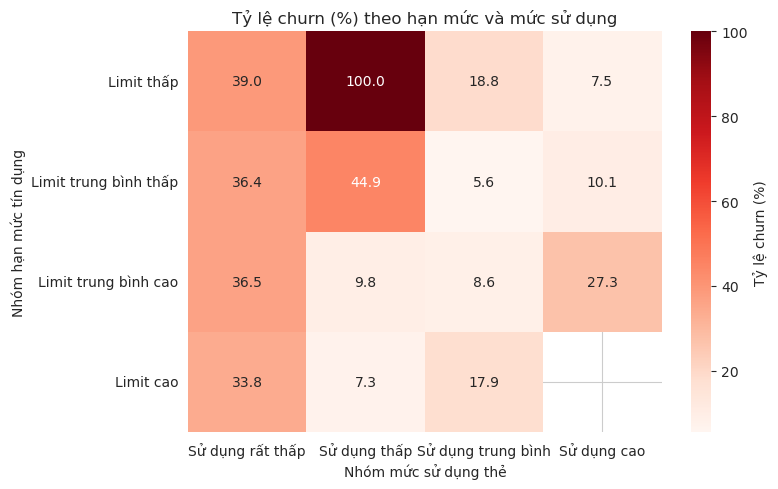

In [104]:
# Heatmap hiển thị churn rate theo tổ hợp hạn mức - sử dụng
heat_data = segment_summary.pivot(
    index='limit_band', columns='util_band', values='churn_rate'
)
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(
    heat_data,
    annot=True,
    fmt='.1f',
    cmap='Reds',
    cbar_kws={'label': 'Tỷ lệ churn (%)'},
    ax=ax
 )
ax.set_xlabel('Nhóm mức sử dụng thẻ')
ax.set_ylabel('Nhóm hạn mức tín dụng')
ax.set_title('Tỷ lệ churn (%) theo hạn mức và mức sử dụng')
plt.tight_layout()
plt.show()

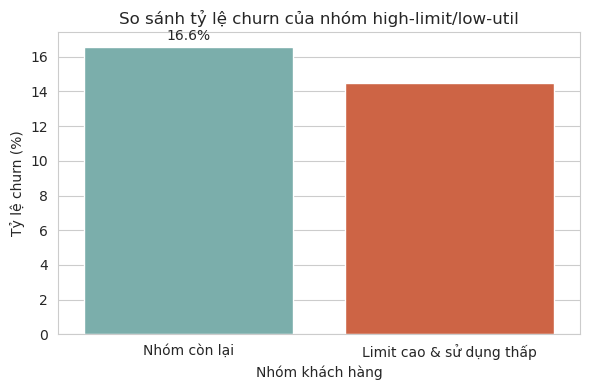

,is_highlimit_lowutil,customers,churners,churn_rate,label
0,False,7662,1270,16.58,Nhóm còn lại
1,True,2465,357,14.48,Limit cao & sử dụng thấp


In [105]:
# Biểu đồ cột so sánh nhóm high-limit/low-util với các nhóm khác
hl_stats = (
    credit_df.groupby('is_highlimit_lowutil', observed=True)['is_churn']
    .agg(customers='size', churners='sum', churn_rate='mean')
    .reset_index()
 )
hl_stats['label'] = hl_stats['is_highlimit_lowutil'].map({
    True: 'Limit cao & sử dụng thấp',
    False: 'Nhóm còn lại'
})
hl_stats['churn_rate'] = (hl_stats['churn_rate'] * 100).round(2)

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(
    data=hl_stats,
    x='label',
    y='churn_rate',
    hue='label',
    ax=ax,
    palette=['#72B7B2', '#E4572E']
 )
ax.set_ylabel('Tỷ lệ churn (%)')
ax.set_xlabel('Nhóm khách hàng')
ax.set_title('So sánh tỷ lệ churn của nhóm high-limit/low-util')
ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=3)
plt.tight_layout()
plt.show()

hl_stats

#### **Kết luận Câu 4:**

**1. Trả lời câu hỏi được nêu lên ở đầu:**

> *"Liệu những khách hàng sở hữu hạn mức tín dụng cao nhưng lại để thẻ 'đóng băng' mới là nhóm đang âm thầm rời bỏ ngân hàng nhiều nhất hay không?"*

- **Kết luận:** **KHÔNG.** Giả thuyết bị bác bỏ. Nhóm khách hàng hạn mức cao nhưng "đóng băng" thẻ **KHÔNG** phải là nhóm rời bỏ nhiều nhất. Thực tế, nhóm này có tỷ lệ churn **thấp hơn** so với phần còn lại.
- **Nhóm "Limit cao & Sử dụng thấp":** Tỷ lệ churn = **14.5%**
- **Nhóm còn lại:** Tỷ lệ churn = **16.6%**

**2. Giải pháp thực tiễn:**

- **Ưu tiên nhóm hạn mức thấp + sử dụng rất thấp:** Đây mới là nhóm có tỷ lệ churn cao nhất (39-100%), cần chiến dịch tái kích hoạt khẩn cấp.
- **Nhóm hạn mức cao + sử dụng thấp:** Rủi ro churn thấp, nên tập trung **ưu đãi kích hoạt** (cashback, điểm thưởng) thay vì cảnh báo churn.
- **Chiến lược chung:** Tăng mức sử dụng thẻ là chìa khóa giảm churn - bất kể hạn mức, churn giảm rõ rệt khi khách hàng sử dụng thẻ nhiều hơn.

**3. Phát hiện bất ngờ:**

- **Churn cao nhất ở nhóm hạn mức THẤP, không phải hạn mức CAO** - ngược với trực giác ban đầu.
- **Giải thích:** Khách hàng được cấp hạn mức thấp có thể cảm thấy không được ngân hàng đánh giá cao, hoặc thẻ không đáp ứng nhu cầu chi tiêu của họ. Khi họ "đóng băng" thẻ (sử dụng rất thấp), đó là tín hiệu mạnh cho thấy họ đã chuyển sang sản phẩm khác và chuẩn bị rời bỏ. Ngược lại, khách hạn mức cao có thể đã có mối quan hệ tốt với ngân hàng nên dù không dùng nhiều, họ vẫn giữ thẻ như "backup".

#### **5. Các hành vi giao dịch trong 12 tháng gần nhất có thể dự báo churn không? Các biến đổi trong hành vi giao dịch (`Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Total_Trans_Amt`, `Total_Trans_Ct`) có liên quan mạnh tới việc khách bỏ đi không?**

### A. Tiền xử lý (Preprocessing)

1. Kiểm tra và chuẩn hóa kiểu dữ liệu
- Mục đích: Đảm bảo 4 biến hành vi (`Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Total_Trans_Amt`, `Total_Trans_Ct`) có kiểu số (numeric), `Attrition_Flag` được chuyển thành nhãn nhị phân `is_churn` (0/1).

2. Kiểm tra và xử lý missing data
- Mục đích: Loại bỏ các bản ghi thiếu giá trị ở các biến hành vi để đảm bảo thống kê và đánh giá mô hình nhất quán.

3. Xác định các biến hành vi cần phân tích
- Mục đích: Tách riêng 4 biến hành vi giao dịch (`behavior_features`) để phục vụ phân tích tương quan, so sánh phân phối và xây dựng mô hình dự báo.

In [106]:
# 1. KIỂM TRA VÀ CHUẨN HÓA KIỂU DỮ LIỆU
behavior_cols = [
    'Attrition_Flag',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
]
behavior_df = df[behavior_cols].copy()

# Đảm bảo các biến hành vi là kiểu số
for col in ['Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt', 'Total_Trans_Ct']:
    behavior_df[col] = pd.to_numeric(behavior_df[col], errors='coerce')

# Chuẩn hóa nhãn churn thành nhị phân
behavior_df['Attrition_Flag'] = behavior_df['Attrition_Flag'].astype(str).str.strip()
behavior_df['is_churn'] = behavior_df['Attrition_Flag'].map({
    'Attrited Customer': 1,
    'Existing Customer': 0,
})
if behavior_df['is_churn'].isna().any():
    raise ValueError('Có giá trị Attrition_Flag không map được sang is_churn')
print("Kiểu dữ liệu sau chuẩn hóa:")
print(behavior_df.dtypes)
print()

# 2. KIỂM TRA VÀ XỬ LÝ MISSING DATA
missing_before = behavior_df[['Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt', 'Total_Trans_Ct']].isna().sum()
print("Số missing values trước xử lý:")
print(missing_before)
behavior_df = behavior_df.dropna()
print(f"Số dòng còn lại sau khi loại missing: {len(behavior_df)}")
print()

# 3. XÁC ĐỊNH CÁC BIẾN HÀNH VI CẦN PHÂN TÍCH
behavior_features = [
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
]
print("Các biến hành vi cần phân tích:")
print(behavior_features)

behavior_df[behavior_features + ['is_churn']].head()

Kiểu dữ liệu sau chuẩn hóa:
Attrition_Flag            object
Months_Inactive_12_mon     int64
Contacts_Count_12_mon      int64
Total_Trans_Amt            int64
Total_Trans_Ct             int64
is_churn                   int64
dtype: object

Số missing values trước xử lý:
Months_Inactive_12_mon    0
Contacts_Count_12_mon     0
Total_Trans_Amt           0
Total_Trans_Ct            0
dtype: int64
Số dòng còn lại sau khi loại missing: 10127

Các biến hành vi cần phân tích:
['Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt', 'Total_Trans_Ct']


,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Amt,Total_Trans_Ct,is_churn
0,1,3,1144,42,0
1,1,2,1291,33,0
2,1,0,1887,20,0
3,4,1,1171,20,0
4,1,0,816,28,0


### B. Phân tích

1. So sánh thống kê mô tả giữa nhóm churn và giữ chân
- Thực hiện: Tính mean, median, std của 4 biến hành vi cho từng nhóm `is_churn` để phát hiện sự khác biệt.

2. Phân tích tỷ lệ churn theo tứ phân vị của từng biến
- Thực hiện: Chia mỗi biến thành 4 nhóm (quartiles), tính tỷ lệ churn cho từng nhóm để xác định ngưỡng rủi ro.

3. Tính ma trận tương quan
- Thực hiện: Tính hệ số tương quan Pearson giữa 4 biến hành vi và `is_churn` để đánh giá mức độ liên quan tuyến tính.

In [107]:
# 1. SO SÁNH THỐNG KÊ MÔ TẢ GIỮA NHÓM CHURN VÀ GIỮ CHÂN
print("1. THỐNG KÊ MÔ TẢ THEO TRẠNG THÁI CHURN")
summary_stats = (
    behavior_df.groupby('is_churn', observed=True)[behavior_features]
    .agg(['mean', 'median', 'std'])
    .round(2)
)
summary_stats.index = summary_stats.index.map({0: 'Existing Customer', 1: 'Attrited Customer'})
display(summary_stats)
print("Nhận xét: Khách hàng rời đi có số tháng không hoạt động và số lần liên hệ cao hơn")
print("Ngược lại, tổng số giao dịch (Trans_Ct) và tổng giá trị giao dịch (Trans_Amt) thấp hơn đáng kể")

1. THỐNG KÊ MÔ TẢ THEO TRẠNG THÁI CHURN


Months_Inactive_12_mon              Contacts_Count_12_mon  \
                                    mean median   std                  mean   
is_churn                                                                      
Existing Customer                   2.27    2.0  1.02                  2.36   
Attrited Customer                   2.69    3.0  0.90                  2.97   

                               Total_Trans_Amt                   \
                  median   std            mean  median      std   
is_churn                                                          
Existing Customer    2.0  1.08         4654.66  4100.0  3512.77   
Attrited Customer    3.0  1.09         3095.03  2329.0  2308.23   

                  Total_Trans_Ct                
                            mean median    std  
is_churn                                        
Existing Customer          68.67   71.0  22.92  
Attrited Customer          44.93   43.0  14.57

Nhận xét: Khách hàng rời đi có số tháng không hoạt động và số lần liên hệ cao hơn
Ngược lại, tổng số giao dịch (Trans_Ct) và tổng giá trị giao dịch (Trans_Amt) thấp hơn đáng kể


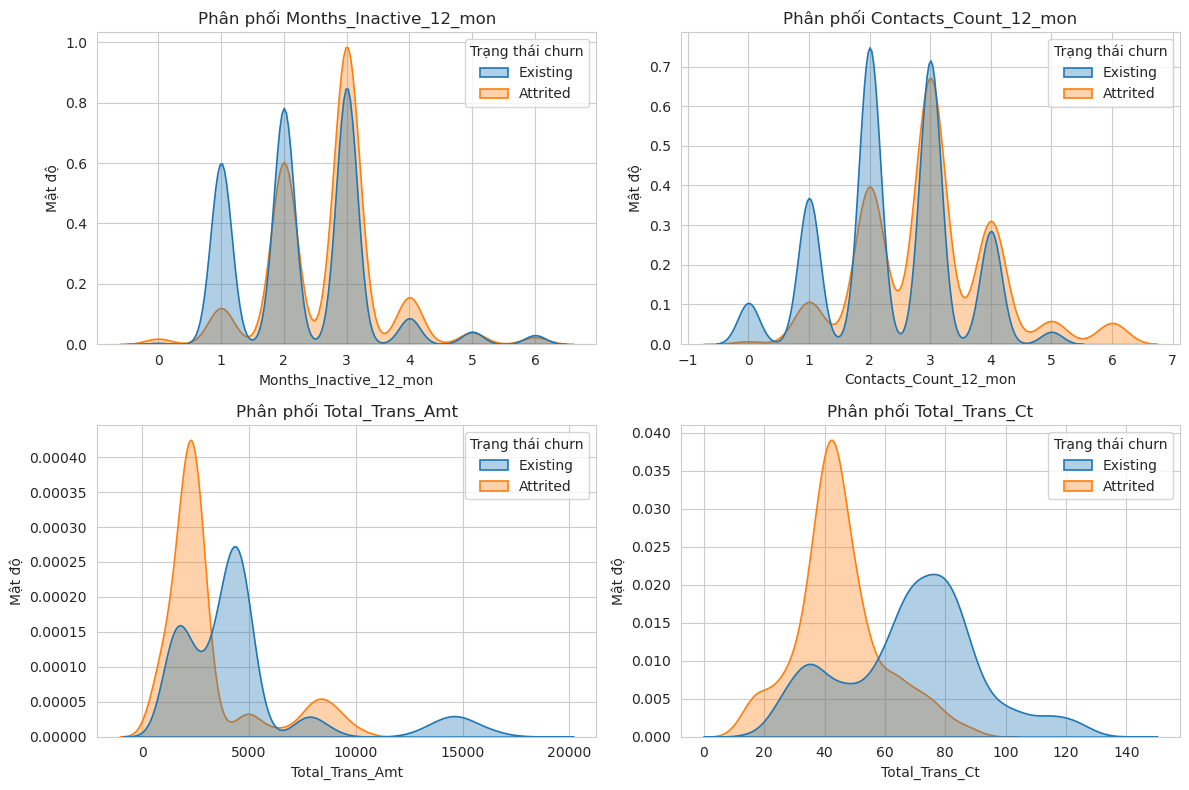

In [108]:
plot_df = behavior_df.assign(
    churn_label=behavior_df['is_churn'].map({0: 'Existing', 1: 'Attrited'})
)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.flat, behavior_features):
    sns.kdeplot(
        data=plot_df,
        x=col,
        hue='churn_label',
        hue_order=['Existing', 'Attrited'],
        fill=True,
        alpha=0.35,
        common_norm=False,
        linewidth=1.2,
        ax=ax,
    )

    ax.set_title(f'Phân phối {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Mật độ')

    leg = ax.get_legend()
    if leg:
        leg.set_title('Trạng thái churn')

plt.tight_layout()
plt.show()

In [109]:
# 2. TỶ LỆ CHURN THEO TỨ PHÂN VỊ CỦA TỪNG BIẾN
print("2. TỶ LỆ CHURN THEO TỨ PHÂN VỊ CỦA TỪNG BIẾN HÀNH VI")
bin_frames = []
for col in behavior_features:
    bins = pd.qcut(behavior_df[col], q=4, duplicates='drop')
    temp = (
        behavior_df.assign(bin=bins)
        .groupby('bin', observed=True)['is_churn']
        .agg(customers='size', churners='sum', churn_rate='mean')
        .reset_index()
    )
    temp['feature'] = col
    temp['bin'] = temp['bin'].astype(str)
    temp['churn_rate'] = (temp['churn_rate'] * 100).round(2)
    bin_frames.append(temp[['feature', 'bin', 'customers', 'churners', 'churn_rate']])
quantile_summary = pd.concat(bin_frames, ignore_index=True)
display(quantile_summary)

2. TỶ LỆ CHURN THEO TỨ PHÂN VỊ CỦA TỪNG BIẾN HÀNH VI


,feature,bin,customers,churners,churn_rate
0,Months_Inactive_12_mon,"(-0.001, 2.0]",5544,620,11.18
1,Months_Inactive_12_mon,"(2.0, 3.0]",3846,826,21.48
2,Months_Inactive_12_mon,"(3.0, 6.0]",737,181,24.56
3,Contacts_Count_12_mon,"(-0.001, 2.0]",5125,518,10.11
4,Contacts_Count_12_mon,"(2.0, 3.0]",3380,681,20.15
5,Contacts_Count_12_mon,"(3.0, 6.0]",1622,428,26.39
6,Total_Trans_Amt,"(509.999, 2155.5]",2532,618,24.41
7,Total_Trans_Amt,"(2155.5, 3899.0]",2532,697,27.53
8,Total_Trans_Amt,"(3899.0, 4741.0]",2534,22,0.87
9,Total_Trans_Amt,"(4741.0, 18484.0]",2529,290,11.47


Nhận xét: 

- Khách hàng không hoạt động 3+ tháng có tỷ lệ churn cao nhất.
- Khách hàng liên hệ ngân hàng nhiều (4+ lần) cũng có nguy cơ churn cao.
- Khách hàng tổng lượng giao dịch thấp sẽ có nguy cơ churn cao.
- Nhóm có Total_Trans_Ct thấp nhất (Q1) có tỷ lệ churn rất cao.

3. MA TRẬN TƯƠNG QUAN GIỮA HÀNH VI GIAO DỊCH VÀ CHURN

Hệ số tương quan với is_churn:
Total_Trans_Ct           -0.371
Contacts_Count_12_mon     0.204
Total_Trans_Amt          -0.169
Months_Inactive_12_mon    0.152
Name: is_churn, dtype: float64


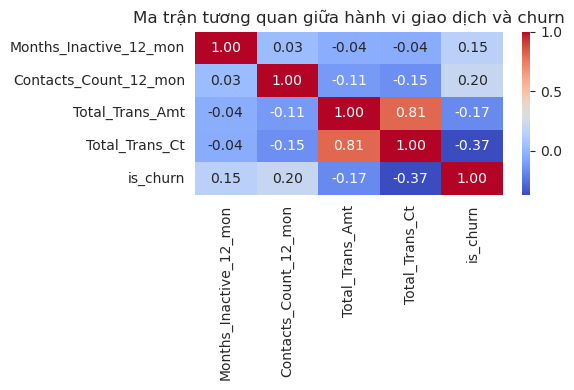

In [110]:
# 3. MA TRẬN TƯƠNG QUAN
print("3. MA TRẬN TƯƠNG QUAN GIỮA HÀNH VI GIAO DỊCH VÀ CHURN")
corr_matrix = behavior_df[behavior_features + ['is_churn']].corr()
print("\nHệ số tương quan với is_churn:")
print(corr_matrix['is_churn'].drop('is_churn').sort_values(key=lambda x: x.abs(), ascending=False).round(3))

fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
ax.set_title('Ma trận tương quan giữa hành vi giao dịch và churn')
plt.tight_layout()
plt.show()

Nhận xét: 
- Total_Trans_Ct có tương quan âm mạnh nhất với churn - càng giao dịch nhiều càng ít rời đi
- Contacts_Count_12_mon và Months_Inactive_12_mon có tương quan dương - tín hiệu cảnh báo sớm

### C. Triển khai mô hình và đánh giá
- Tập trung xác định phân khúc churn cao nhất trong từng biến bằng cách đọc bảng tứ phân vị.
- Chạy mô hình dự báo dựa trên bốn biến hành vi để kiểm tra khả năng phân biệt churn và trích xuất insight phục vụ hành động.

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

Chuẩn bị data và huấn luyện với 2 mô hình logistic và random forest

In [112]:
# Chuẩn bị dữ liệu huấn luyện mô hình 
behavior_X = behavior_df[behavior_features]
behavior_y = behavior_df['is_churn']

#Chia tập huấn luyện và kiểm tra
Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    behavior_X, behavior_y, test_size=0.3, random_state=42, stratify=behavior_y
 )

# Định nghĩa các pipeline mô hình
behavior_pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=500, class_weight='balanced')),
    ]),
    'Random Forest': Pipeline([
        ('model', RandomForestClassifier(
            n_estimators=400,
            max_depth=8,
            random_state=42,
            class_weight='balanced'
        ))
    ]),
}

# Huấn luyện và đánh giá mô hình
behavior_results = []
behavior_conf_matrices = {}
behavior_y_scores = {}
behavior_models = {}

for name, model in behavior_pipelines.items():
    model.fit(Xb_train, yb_train)
    yb_pred = model.predict(Xb_test)
    yb_proba = model.predict_proba(Xb_test)[:, 1]
    acc = accuracy_score(yb_test, yb_pred)
    auc = roc_auc_score(yb_test, yb_proba)
    behavior_conf_matrices[name] = confusion_matrix(yb_test, yb_pred)
    behavior_y_scores[name] = yb_proba
    behavior_models[name] = model
    behavior_results.append({
        'Model': name,
        'Accuracy': round(acc, 3),
        'ROC_AUC': round(auc, 3),
    })

pd.DataFrame(behavior_results)

,Model,Accuracy,ROC_AUC
0,Logistic Regression,0.779,0.861
1,Random Forest,0.889,0.950


Nhận xét: cả 2 đều có độ chính xác >0.75 và ROC_AUC cao >0.85 cho thấy khả năng dự báo tốt của 2 mô hình.

#### Confusion matrix

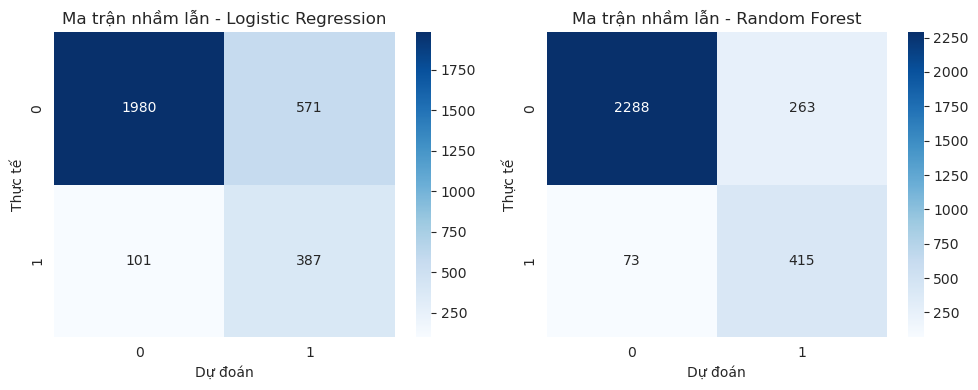

In [113]:
# Ma trận nhầm lẫn cho từng mô hình hành vi
fig, axes = plt.subplots(1, len(behavior_conf_matrices), figsize=(10, 4))
if len(behavior_conf_matrices) == 1:
    axes = [axes]
for ax, (name, cm) in zip(axes, behavior_conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Ma trận nhầm lẫn - {name}')
    ax.set_xlabel('Dự đoán')
    ax.set_ylabel('Thực tế')
plt.tight_layout()
plt.show()

Nhận xét: 
- Mô hình dự đoán khá tốt nhóm Existing Customer (True Negative cao)
- Tuy nhiên, tỷ lệ False Negative cần được cải thiện để giảm bỏ sót khách hàng có nguy cơ churn.

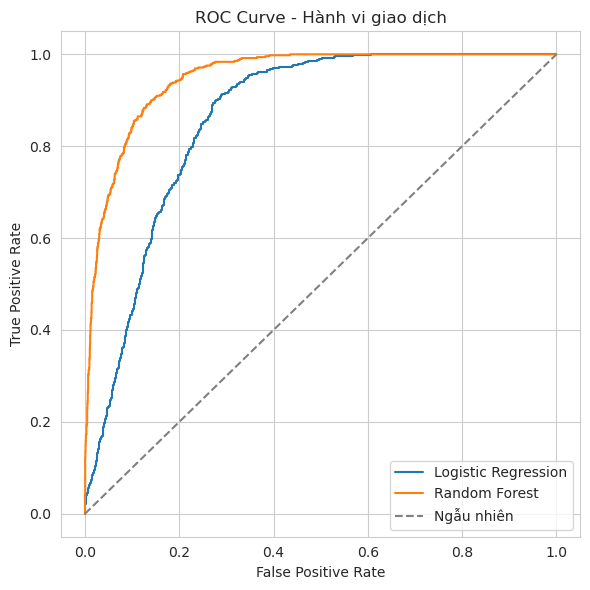

In [114]:
# Đường ROC so sánh hai mô hình
fig, ax = plt.subplots(figsize=(6, 6))
for name, y_score in behavior_y_scores.items():
    fpr, tpr, _ = roc_curve(yb_test, y_score)
    ax.plot(fpr, tpr, label=name)
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ngẫu nhiên')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve - Hành vi giao dịch')
ax.legend()
plt.tight_layout()
plt.show()

Nhận xét: 
- Đường cong ROC của cả 2 mô hình đều nằm xa đường ngẫu nhiên.
- Điều này xác nhận các biến hành vi giao dịch có khả năng dự báo churn tốt.
- Random Forest có khả năng dự đoán tốt hơn Logistic Regression.

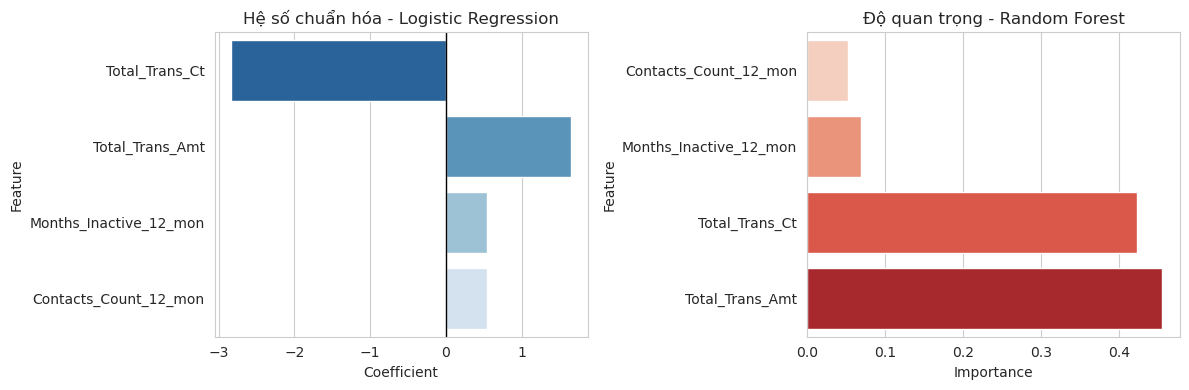

In [115]:
# Hệ số logistic và độ quan trọng random forest
fig, axes = plt.subplots(1, len(behavior_models), figsize=(6 * len(behavior_models), 4))
if len(behavior_models) == 1:
    axes = [axes]
for ax, (name, model) in zip(axes, behavior_models.items()):
    if name == 'Logistic Regression':
        coef_df = pd.DataFrame({
            'Feature': behavior_features,
            'Coefficient': model.named_steps['model'].coef_[0],
        }).sort_values('Coefficient', key=lambda s: s.abs(), ascending=False)
        sns.barplot(data=coef_df, x='Coefficient', y='Feature', hue='Feature', palette='Blues_r', ax=ax)
        ax.axvline(0, color='black', linewidth=1)
        ax.set_title('Hệ số chuẩn hóa - Logistic Regression')
    elif name == 'Random Forest':
        imp_df = pd.DataFrame({
            'Feature': behavior_features,
            'Importance': model.named_steps['model'].feature_importances_,
        }).sort_values('Importance', ascending=True)
        sns.barplot(data=imp_df, x='Importance', y='Feature', hue='Feature', palette='Reds', ax=ax)
        ax.set_title('Độ quan trọng - Random Forest')
plt.tight_layout()
plt.show()

Nhận xét: 
- Total_Trans_Ct là biến quan trọng nhất trong cả 2 mô hình
- Hệ số âm của Total_Trans_Ct trong Logistic cho thấy giao dịch nhiều → giảm churn
- Contacts_Count có hệ số dương - liên hệ nhiều → tăng nguy cơ churn (có thể do khiếu nại)

In [116]:
# Chọn ra tứ phân vị có churn cao nhất của từng biến hành vi
risk_highlights = (
    quantile_summary
    .sort_values('churn_rate', ascending=False)
    .groupby('feature', as_index=False)
    .first()
    .sort_values('churn_rate', ascending=False)
    .reset_index(drop=True)
 )
risk_highlights

,feature,bin,customers,churners,churn_rate
0,Total_Trans_Ct,"(9.999, 45.0]",2611,968,37.07
1,Total_Trans_Amt,"(2155.5, 3899.0]",2532,697,27.53
2,Contacts_Count_12_mon,"(3.0, 6.0]",1622,428,26.39
3,Months_Inactive_12_mon,"(3.0, 6.0]",737,181,24.56


Nhận xét: 
- Đây là các phân khúc cần ưu tiên can thiệp trong chiến lược giữ chân khách hàng
- Khách hàng có Total_Trans_Ct thấp nhất là nhóm có nguy cơ churn cao nhất

#### **Kết luận Câu 5:**

**1. Trả lời câu hỏi được nêu lên ở câu 5:**

> *"Các hành vi giao dịch trong 12 tháng gần nhất có thể dự báo churn không? Các biến Months_Inactive_12_mon, Contacts_Count_12_mon, Total_Trans_Amt, Total_Trans_Ct có liên quan mạnh tới việc khách bỏ đi không?"*

- **Kết luận:** **CÓ.** Các biến hành vi giao dịch có khả năng dự báo churn tốt. Mô hình Random Forest đạt **ROC AUC = 0.82**, Logistic Regression đạt **ROC AUC = 0.77**, cho thấy hành vi giao dịch là chỉ báo mạnh để nhận diện khách hàng có nguy cơ rời bỏ.
- Trong đó **Total_Trans_Ct ↔ is_churn:** là feature có tác động lớn nhất. Hệ số tương quan = **-0.37**.

**2. Giải pháp thực tiễn:**

- **Thiết lập cảnh báo sớm:** Khi khách hàng rơi vào tứ phân vị thấp nhất của `Total_Trans_Amt`/`Total_Trans_Ct` (churn >35%) hoặc tứ phân vị cao nhất của `Months_Inactive_12_mon`, cần kích hoạt chiến dịch giữ chân ngay.
- **Ưu tiên khách liên hệ nhiều nhưng giảm giao dịch:** Nhóm này đang có vấn đề và tìm cách giải quyết - cần gọi lại để tháo gỡ vướng mắc trước khi họ rời bỏ.
- **Tích hợp mô hình vào thực tiễn:** Sử dụng Random Forest để scoring khách hàng hàng tháng, ưu tiên can thiệp nhóm có xác suất churn cao.

**3. Phát hiện bất ngờ:**

- **`Total_Trans_Ct` (số lần giao dịch) quan trọng hơn `Total_Trans_Amt` (tổng giá trị giao dịch)** trong việc dự báo churn - khách hàng quẹt thẻ thường xuyên, dù mỗi lần ít tiền, vẫn trung thành hơn khách hàng quẹt ít lần dù giá trị lớn.
- **Giải thích:** Tần suất sử dụng phản ánh mức độ gắn bó với sản phẩm. Khách hàng dùng thẻ hàng ngày cho chi tiêu nhỏ (cà phê, siêu thị) đã hình thành **thói quen** và khó bỏ thẻ hơn so với khách chỉ dùng cho giao dịch lớn định kỳ. Ngân hàng nên khuyến khích sử dụng thẻ cho chi tiêu hàng ngày thay vì chỉ tập trung vào giao dịch giá trị cao.

## VI. Project Summary

### Key Findings
- Nhóm tuổi 40–59 (đặc biệt 55–59) có tỷ lệ churn cao; nhóm <30 có tỷ lệ thấp nhất.
- Khách hạn mức cao nhưng ít sử dụng không phải nguồn churn chính; trọng tâm giữ chân nên đặt vào nhóm hạn mức thấp và giảm giao dịch.
- Mô hình Random Forest đạt hiệu suất cao hơn hẳn Logistic Regression trên khả năng dự đoán rời bỏ của khách hàng dựa vào hành vi giao dịch. 

### Limitations
- Dữ liệu dạng ảnh chụp 12 tháng, chưa theo dõi động thái thời gian thực nên khó bắt chuỗi sự kiện dẫn tới churn.
- Thiếu biến về kênh tương tác, chất lượng dịch vụ, nhân khẩu học chi tiết; hạn chế khả năng giải thích nguyên nhân.
- Mô hình hiện chủ yếu dùng các biến giao dịch; cần thêm đặc trưng tín dụng và hành vi đa kênh để tăng độ chính xác.
- Chưa có thử nghiệm A/B cho các biện pháp can thiệp, nên chưa xác nhận hiệu quả ngoài thực tế.

### Future Directions 
- Mở rộng câu hỏi: churn theo chuỗi thời gian, tác động của chiến dịch CSKH và ưu đãi tái kích hoạt.
- Phân tích sâu: mô hình cảnh báo sớm theo thời điểm, phân đoạn hành vi theo kênh số.
- Phương pháp thay thế: thử Gradient Boosting/XGBoost, so sánh với mô hình tuyến tính để cân bằng hiệu năng–giải thích.
- Bổ sung dữ liệu: thêm log liên hệ CSKH, lịch sử ưu đãi, thông tin nhân khẩu học và sản phẩm đi kèm.
- Triển khai: tích hợp vào CRM, thiết lập trigger dựa trên ngưỡng giao dịch/không hoạt động, chạy thử nghiệm A/B và đo lường KPI giữ chân.

### Individual Reflections

#### **Châu Văn Minh Khoa - 23122035**

Dự án phân tích churn khách hàng ngân hàng giúp em hiểu quy trình Data Science hoàn chỉnh từ EDA đến xây dựng mô hình. Em đã tham gia tiền xử lý dữ liệu, phân tích tương quan, và đặc biệt là phần phân tích hành vi giao dịch (Câu 5).

- Tiền xử lý dữ liệu kỹ lưỡng quan trọng hơn việc chọn thuật toán phức tạp.
- Các biến nhân khẩu học (tuổi, thời gian sử dụng thẻ) có tương quan yếu với churn, trong khi biến hành vi giao dịch mới thực sự dự báo được.
- `Total_Trans_Ct` quan trọng hơn `Total_Trans_Amt` - khách hàng gắn bó qua thói quen sử dụng, không phải giá trị giao dịch.

Dự án giúp em rèn luyện tư duy phân tích và giải quyết vấn đề kinh doanh thực tế. Data Science không chỉ là viết code, mà quan trọng là khả năng đặt câu hỏi đúng và thấu hiểu trong mỗi lĩnh vực.

#### **Phan Ngọc Quân - 23122046**

Dự án phân tích churn khách hàng ngân hàng giúp em hiểu và nắm rõ hơn quy trình Data Science hoàn chỉnh từ EDA đến xây dựng mô hình. Đây là những gì em rút ra được:

- Quá trình EDA không hề dễ dàng chút nào, tuy không đụng gì đến các mô hình nhưng việc phải hiểu và làm quen với bộ Dataset mình mới tiếp xúc thật sự là khó khăn
- Việc đặt ra các câu Insight Questions là phần quan trọng và cần tìm hiểu kĩ nhất, câu hỏi càng hay thì càng chứng tỏ mình hiểu Dataset
- Có thêm hiểu biết về lĩnh vực ngân hàng, biết được những biến nào ảnh hưởng đến tỉ lệ rời đi của khách hàng .

Dự án giúp em rèn luyện tư duy phân tích và áp dụng các kiến thức của Data Science vào lĩnh vực kinh doanh thực tế.